In [1]:
import numpy as np
import os, json, re
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats.mstats import gmean
from cycler import cycler
import statistics
import seaborn as sns
import matplotlib.patches as mpatches
import os
import PIL 
cwd = os.getcwd()

In [2]:
#CAPACITY
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

elec_gen = pd.read_csv('Capacity 2023.csv')
elec_gen = elec_gen.T
header_row = 0
elec_gen.columns = elec_gen.iloc[header_row]
elec_gen.head()
elec_gen.columns = ['coal', 'gas', 'wind', 'nuclear','hydro', 'oil', 'solar']
elec_gen


coal    gas   wind  nuclear  hydro   oil  solar
Unnamed: 0   coal    gas   wind  nuclear  hydro   oil  solar
2022        197.8  257.8  144.0     94.8   79.2  74.2   75.0
2023        188.2  260.8  148.1     97.0   79.2  72.3  103.1
2024        184.2  257.9  152.0     97.0   79.3  64.1  138.3
2025        164.2  257.8  167.9     95.9   79.2  58.9  182.3
2026        157.9  257.8  187.6     94.8   79.3  57.3  237.2
2027        146.3  264.9  212.3     94.8   79.3  57.7  282.7
2028        126.6  266.1  243.2     93.4   79.3  59.4  311.0
2029        109.7  268.5  270.4     93.4   79.3  58.4  326.3
2030        102.1  269.2  290.1     92.4   79.3  58.1  338.3
2031        100.4  270.1  297.9     92.4   79.3  56.5  361.7
2032         97.3  270.8  302.6     92.4   79.3  55.6  390.6
2033         96.0  271.5  317.0     87.4   79.3  54.6  406.7
2034         92.8  271.2  319.3     86.4   79.3  54.1  426.3
2035         91.2  271.3  320.4     85.5   79.3  53.2  434.8
2036         90.6  271.5  321.9     83.4   79.3  53.2  455.4
2037         88.7  272.5  322.9     82.0   79.3  53.2  471.0
2038         84.3  273.0  323.8     79.6   79.3  53.1  490.5
2039         81.3  273.0  324.8     78.4   79.3  53.0  499.2
2040         77.0  272.9  325.9     75.9   79.3  53.0  515.3
2041         74.8  272.9  326.3     75.9   79.3  53.7  524.3
2042         74.8  272.0  326.8     75.9   79.3  53.7  538.8
2043         74.8  272.0  329.1     75.9   79.3  53.7  555.6
2044         74.1  271.8  331.1     75.9   79.3  53.3  576.5
2045         74.1  271.8  333.7     75.9   79.3  53.3  602.8
2046         71.6  275.1  336.4     75.9   79.4  53.3  626.4
2047         70.4  276.5  340.4     75.9   79.4  53.3  642.5
2048         69.8  276.6  344.6     75.9   79.4  53.3  656.5
2049         69.8  278.1  346.7     75.9   79.4  53.2  676.0
2050         69.8  280.2  350.0     75.9   79.4  53.2  694.7

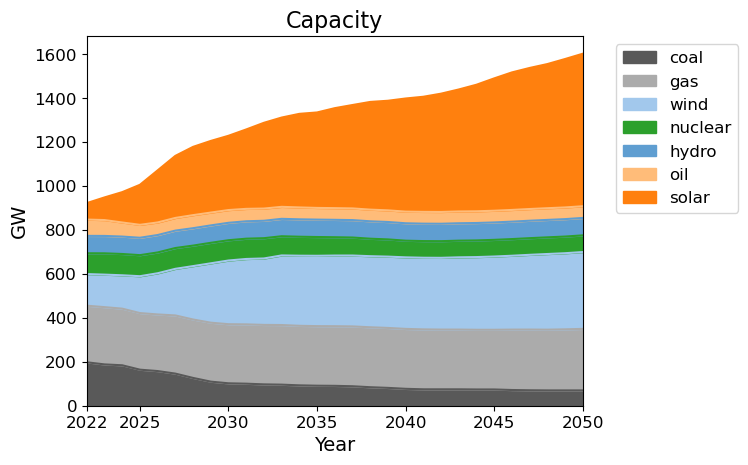

In [3]:
elec_gen=elec_gen.apply(pd.to_numeric, errors='coerce')
elec_gen=elec_gen.iloc[1: , :].dropna(how='all')
elec_gen=elec_gen.dropna(how='all', axis=1)

new_cols = ["coal","gas","wind", "nuclear", "hydro","oil","solar"]
elec_gen=elec_gen[new_cols]

#plt.style.use('tableau-colorblind10')
ax = elec_gen.plot.area(color=('#595959','#ababab','#a2c8ec','#2ca02c','#5f9ed1','#ffbc79','#ff800e'))
plt.rc('axes')
plt.xlim([0,28])
fontsize = 12
plt.title("Capacity", fontsize = 16)
plt.xlabel("Year", fontsize = 14)
plt.ylabel("GW", fontsize = 14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 12})
plt.xticks(fontsize=12 )
plt.yticks(fontsize=12 )
xticks = [0, 3, 8, 13, 18, 23, 28]
xtick_labels = [2022, 2025, 2030, 2035, 2040, 2045, 2050]
plt.xticks(xticks)
ax.set_xticklabels(xtick_labels)
plt.savefig("Capacity.tiff",bbox_inches='tight', dpi=650)
plt.show()
#elec_gen.to_csv('Capacity 2023.csv')
 

In [4]:
gen = pd.read_csv("Generation 2023.csv") # from IEA
gen = gen.T
header_row = 0
gen.columns = gen.iloc[header_row]
gen.columns = ['coal', 'gas', 'wind', 'nuclear','hydro', 'oil', 'solar','total']
gen

coal          gas   wind        nuclear                hydro  \
Source   Coal  Natural Gas   Wind  Nuclear Power  Hydroelectric Power   
2022    832.0       1452.0  144.0          772.0                 79.2   
2023    784.0       1354.0  148.1          784.0                 79.2   
2024    824.0       1260.0  152.0          789.0                 79.3   
2025    755.0       1195.0  167.9          782.0                 79.2   
2026    647.0       1141.0  187.6          775.0                 79.3   
2027    549.0       1056.0  212.3          775.0                 79.3   
2028    453.0       1013.0  243.2          766.0                 79.3   
2029    384.0        977.0  270.4          766.0                 79.3   
2030    345.0        932.0  290.1          758.0                 79.3   
2031    336.0        887.0  297.9          758.0                 79.3   
2032    333.0        853.0  302.6          758.0                 79.3   
2033    342.0        828.0  317.0          715.0                 79.3   
2034    340.0        803.0  319.3          709.0                 79.3   
2035    340.0        793.0  320.4          700.0                 79.3   
2036    337.0        795.0  321.9          684.0                 79.3   
2037    328.0        805.0  322.9          673.0                 79.3   
2038    316.0        828.0  323.8          654.0                 79.3   
2039    309.0        839.0  324.8          645.0                 79.3   
2040    300.0        862.0  325.9          625.0                 79.3   
2041    302.0        871.0  326.3          626.0                 79.3   
2042    302.0        885.0  326.8          626.0                 79.3   
2043    298.0        893.0  329.1          626.0                 79.3   
2044    287.0        895.0  331.1          626.0                 79.3   
2045    279.0        903.0  333.7          626.0                 79.3   
2046    269.0        901.0  336.4          626.0                 79.4   
2047    264.0        904.0  340.4          626.0                 79.4   
2048    254.0        915.0  344.6          625.0                 79.4   
2049    252.0        919.0  346.7          625.0                 79.4   
2050    243.0        931.0  350.0          625.0                 79.4   

              oil     solar   total  
Source  Petroleum  Solar PV   Total  
2022         10.0      75.0  3364.2  
2023         10.0     103.1  3262.4  
2024         10.0     138.3  3252.6  
2025          9.0     182.3  3170.4  
2026          9.0     237.2  3076.1  
2027          8.0     282.7  2962.3  
2028          7.0     311.0  2872.5  
2029          7.0     326.3  2810.0  
2030          6.0     338.3  2748.7  
2031          6.0     361.7  2725.9  
2032          6.0     390.6  2722.5  
2033          6.0     406.7  2694.0  
2034          6.0     426.3  2682.9  
2035          6.0     434.8  2673.5  
2036          6.0     455.4  2678.6  
2037          6.0     471.0  2685.2  
2038          6.0     490.5  2697.6  
2039          5.0     499.2  2701.3  
2040          5.0     515.3  2712.5  
2041          5.0     524.3  2733.9  
2042          5.0     538.8  2762.9  
2043          4.0     555.6  2785.0  
2044          4.0     576.5  2798.9  
2045          4.0     602.8  2827.8  
2046          4.0     626.4  2842.2  
2047          4.0     642.5  2860.3  
2048          4.0     656.5  2878.5  
2049          4.0     676.0  2902.1  
2050          4.0     694.7  2927.1

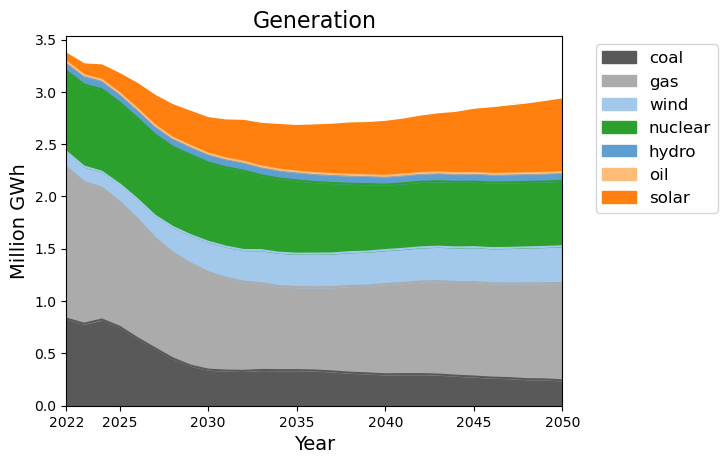

In [5]:
gen=gen.apply(pd.to_numeric, errors='coerce')
gen=gen.iloc[1: , :].dropna(how='all')
gen=gen.iloc[: , :-1] #drop the last "Total" column

gen1 = gen/1000

#def_cycler = (cycler(color = ['r', 'g', 'b', 'y', 'c', 'gold', 'm']))
plt.style.use('tableau-colorblind10')
gen_plot = gen1.plot.area(color=('#595959','#ababab','#a2c8ec','#2ca02c','#5f9ed1','#ffbc79','#ff800e'))
plt.xlim([0, 28])
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes')
plt.title("Generation", fontsize = 16)

#plt.xticks(fontsize=12 )
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Million GWh", fontsize = 14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 12})
xticks = [0, 3, 8, 13, 18, 23, 28]
xtick_labels = [2022, 2025, 2030, 2035, 2040, 2045, 2050]
plt.xticks(xticks)
gen_plot.set_xticklabels(xtick_labels)
plt.savefig("Generation.tiff",bbox_inches='tight', dpi=650)
plt.show()
#gen.to_csv('generation.csv')

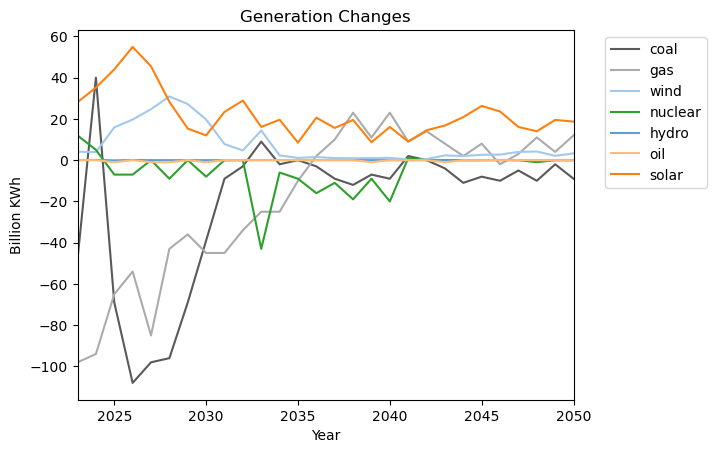

In [6]:
chang_g = gen.diff()  #find difference in annual generation
change_gen= chang_g.plot(color=('#595959','#ababab','#a2c8ec','#2ca02c','#5f9ed1','#ffbc79','#ff800e'))
plt.title("Generation Changes")
plt.xlabel("Year")
plt.ylabel("Billion KWh")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim([1, 28])
xticks = [3, 8, 13, 18, 23, 28]
xtick_labels = [2025, 2030, 2035, 2040, 2045, 2050]
plt.xticks(xticks)
change_gen.set_xticklabels(xtick_labels)
plt.savefig("Generation changes.tiff",bbox_inches='tight', dpi=650)
plt.show()

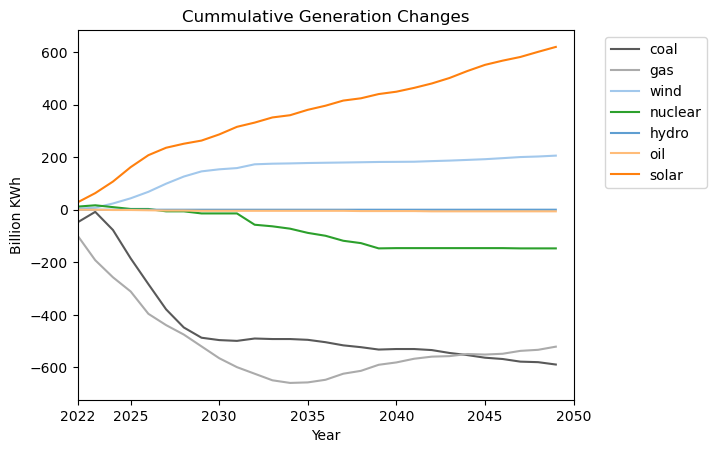

In [7]:
g= chang_g.iloc[1: , :].cumsum()
cum_change = g.plot(color=('#595959','#ababab','#a2c8ec','#2ca02c','#5f9ed1','#ffbc79','#ff800e'))
plt.title("Cummulative Generation Changes")
plt.xlabel("Year")
plt.ylabel("Billion KWh")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.xlim([2, 30])
plt.xlim([0, 28])
xticks = [0, 3, 8, 13, 18, 23, 28]
xtick_labels = [2022, 2025, 2030, 2035, 2040, 2045, 2050]
plt.xticks(xticks)
cum_change.set_xticklabels(xtick_labels)
plt.savefig("Cumulative generation changes.tiff",bbox_inches='tight', dpi=650)
plt.show()

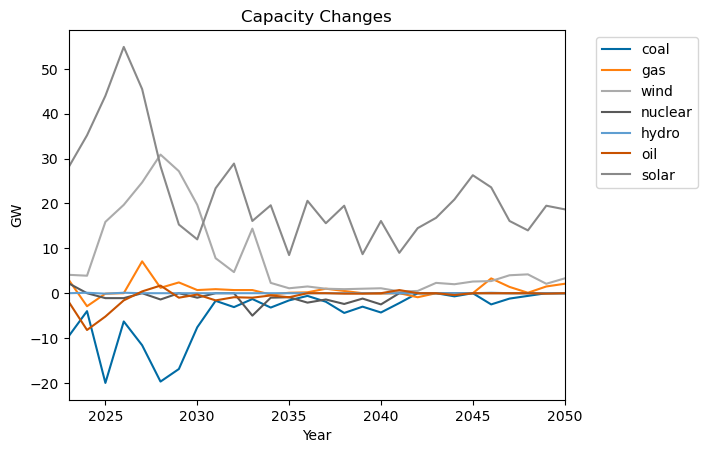

In [8]:
changes_cap = elec_gen.diff()  #capacity changes
change = changes_cap.plot()
plt.title("Capacity Changes")
plt.xlabel("Year")
plt.ylabel("GW")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim([1, 28])
xticks = [3, 8, 13, 18, 23, 28]
xtick_labels = [2025, 2030, 2035, 2040, 2045, 2050]
plt.xticks(xticks)
change.set_xticklabels(xtick_labels)
plt.savefig("Capacity CHanges.tiff",bbox_inches='tight', dpi=650)
plt.show()

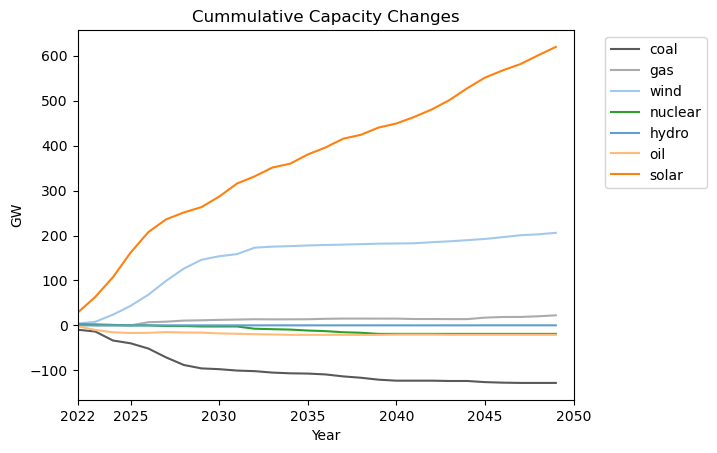

In [9]:
cap_changes_cumul=changes_cap.iloc[1: , :].cumsum()
cum_cap_ch=cap_changes_cumul.plot(color=('#595959','#ababab','#a2c8ec','#2ca02c','#5f9ed1','#ffbc79','#ff800e'))
plt.title("Cummulative Capacity Changes")
plt.xlabel("Year")
plt.ylabel("GW")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim([0, 28])
xticks = [0, 3, 8, 13, 18, 23, 28]
xtick_labels = [2022, 2025, 2030, 2035, 2040, 2045, 2050]
plt.xticks(xticks)
cum_cap_ch.set_xticklabels(xtick_labels)
plt.savefig("Cumulative Capacity Changes.tiff",bbox_inches='tight', dpi=650)
plt.show()

In [10]:
changes_cap=changes_cap.iloc[1: , :]
changes_cap.head(2)

coal  gas  wind  nuclear  hydro  oil  solar
2023  -9.6  3.0   4.1      2.2    0.0 -1.9   28.1
2024  -4.0 -2.9   3.9      0.0    0.1 -8.2   35.2

In [11]:
total_elec = elec_gen.sum(axis=1)

In [12]:
constructions = changes_cap[(changes_cap >0)].dropna(how='all', axis=1)
constructions = constructions.fillna(0)

In [13]:
decommission = changes_cap[(changes_cap < 0)].dropna(how='all', axis=1)
decommission = decommission.fillna(0)
decommissions=abs(decommission)

In [14]:
#read json data 

path_to_json = cwd+'/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('_data.json')]
    

def energy_frame_add(energy_frame, new_entry):
    energy_frame.loc[len(energy_frame.index)] = new_entry

def process_next_level(current_source, a, previous_keys, energy_frame):  #а - текущий уровень
    current_keys = a.keys() #keys to the deeper level 
    
    if "val" in current_keys:
        new_thing_to_add = [current_source] + previous_keys[1:] + [a["val"]] + [a["unit"]]  #excluding word "data"
#         print(new_thing_to_add)
        energy_frame_add(energy_frame, new_thing_to_add)
    else:
        for key in current_keys:
#             print(key)
            if key != "bib":
                process_next_level(current_source, a.get(key), previous_keys + [key], energy_frame)  # "a.get(key)"" - returns understructure (recursive structure). remembers previous keys but at the same time knows where it is 
    

# process_next_level(a_dict, energy_frame)
keys_list = []

In [15]:
energy_frame = pd.DataFrame(columns=[ "source", "stream",  "material", "value",  "unit"])
materials_portfolio = pd.DataFrame
df = list()

#energy_frame.add
for index, js in enumerate(json_files):
    file_path = os.path.join(path_to_json, js)    
    with open(file_path) as json_file:
        energy_data = pd.read_json(js)
        current_source = js.split('_')[0]
        #print(current_source)
        process_next_level(current_source, energy_data, keys_list, energy_frame)
        energy_frame
    energy_s = energy_frame.append(energy_frame, ignore_index=True)


In [16]:
energy_s = pd.read_csv("C:/Users/User/Work - Anthropocene Institute/Data/model_data_f.csv")


In [17]:
energy_s = energy_s.drop_duplicates()
#energy_s[energy_s["material"].str.contains("refueling")==False]
energy_s

source      stream       material         m3/MW        m3/MWh  \
0     coal  front_need       aluminum  1.546125e-01  8.400000e-07   
1     coal   oper_need           coal  6.122889e+04  3.328380e-01   
2     coal  front_need       concrete  6.614917e+01  3.595850e-04   
3     coal  oper_waste  lime_mining_w  1.748242e+03  3.019963e-03   
4     coal  oper_waste       lime_FGC  1.158022e+06  6.294964e+00   
..     ...         ...            ...           ...           ...   
239  hydro  back_waste         copper  1.544545e-01  8.480000e-07   
240  hydro  back_waste           iron  1.440000e+02  7.903060e-04   
241  hydro  front_need       concrete  3.185000e+03  1.748002e-02   
242  hydro  front_need         copper  3.861362e-01  2.120000e-06   
243  hydro  front_need           iron  2.405146e+01  1.320000e-04   

      coordinate mining site  location mining  reference mining  \
0         (58.1415,-133.737)              NaN               NaN   
1    (37.611461,-120.594678)              NaN               NaN   
2         (57.6861,-152.895)              NaN               NaN   
3          (41.949,-74.2063)              NaN               NaN   
4    (64.505331,-165.429814)              NaN               NaN   
..                       ...              ...               ...   
239      (58.3269,-134.4631)              NaN               NaN   
240      (59.4545,-135.3131)              NaN               NaN   
241  (55.615208,-131.356111)              NaN               NaN   
242  (55.615208,-131.356111)              NaN               NaN   
243       (57.6861,-152.895)              NaN               NaN   

     coordinate processing   locaton processing  reference processing  
0                       NaN                 NaN                   NaN  
1                       NaN                 NaN                   NaN  
2                       NaN                 NaN                   NaN  
3                       NaN                 NaN                   NaN  
4                       NaN                 NaN                   NaN  
..                      ...                 ...                   ...  
239                     NaN                 NaN                   NaN  
240                     NaN                 NaN                   NaN  
241                     NaN                 NaN                   NaN  
242                     NaN                 NaN                   NaN  
243                     NaN                 NaN                   NaN  

[244 rows x 11 columns]

In [18]:
del decommissions['oil']

In [19]:
del constructions['oil']

In [20]:
total_waste=energy_s[energy_s['stream'].str.contains('waste')].groupby([ "source", "stream"],  as_index=False).sum()
total_need=energy_s[energy_s['stream'].str.contains('need')].groupby(["source", "stream"],  as_index=False).sum()
total_need

source      stream         m3/MW      m3/MWh  location mining  \
0      coal  front_need  7.287556e+01    0.000396              0.0   
1      coal   oper_need  1.225358e+06    6.661000              0.0   
2       gas  front_need  4.479717e+01    0.000201              0.0   
3       gas   oper_need  5.814806e+07  260.310054              0.0   
4     hydro  front_need  3.210023e+03    0.017617              0.0   
5   nuclear  front_need  7.453468e+01    0.000158              0.0   
6   nuclear   oper_need  4.758541e+00    0.000010              0.0   
7     solar  front_need  6.065704e+03    0.153874              0.0   
8     solar   oper_need  7.323736e+00    0.000186              0.0   
9      wind  front_need  3.348914e+03    0.076459              0.0   
10     wind   oper_need  4.004848e+00    0.000091              0.0   

    reference mining  coordinate processing   locaton processing  \
0                0.0                     0.0                 0.0   
1                0.0                     0.0                 0.0   
2                0.0                     0.0                 0.0   
3                0.0                     0.0                 0.0   
4                0.0                     0.0                 0.0   
5                0.0                     0.0                 0.0   
6                0.0                     0.0                 0.0   
7                0.0                     0.0                 0.0   
8                0.0                     0.0                 0.0   
9                0.0                     0.0                 0.0   
10               0.0                     0.0                 0.0   

    reference processing  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0  
5                    0.0  
6                    0.0  
7                    0.0  
8                    0.0  
9                    0.0  
10                   0.0

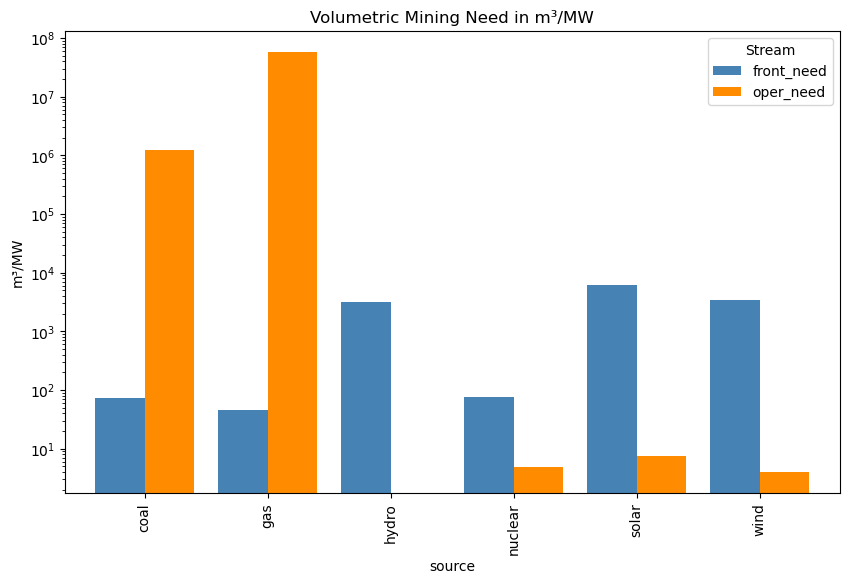

In [21]:
# Pivot the DataFrame to have separate columns for 'front_need' and 'oper_need'
total_need_pivot = total_need.pivot(index='source', columns='stream', values='m3/MW')

# Plot the bar plot
ax = total_need_pivot.plot(kind='bar', color=('steelblue','darkorange'), width=0.8, figsize=(10, 6))
ax.set_yscale('log')
# Customize the plot
plt.xlabel('source')
plt.ylabel('m³/MW')
plt.title('Volumetric Mining Need in m³/MW')
ax.legend(title='Stream')
plt.savefig('Volumetric Mining Need in MW.tiff', bbox_inches='tight', dpi=650)

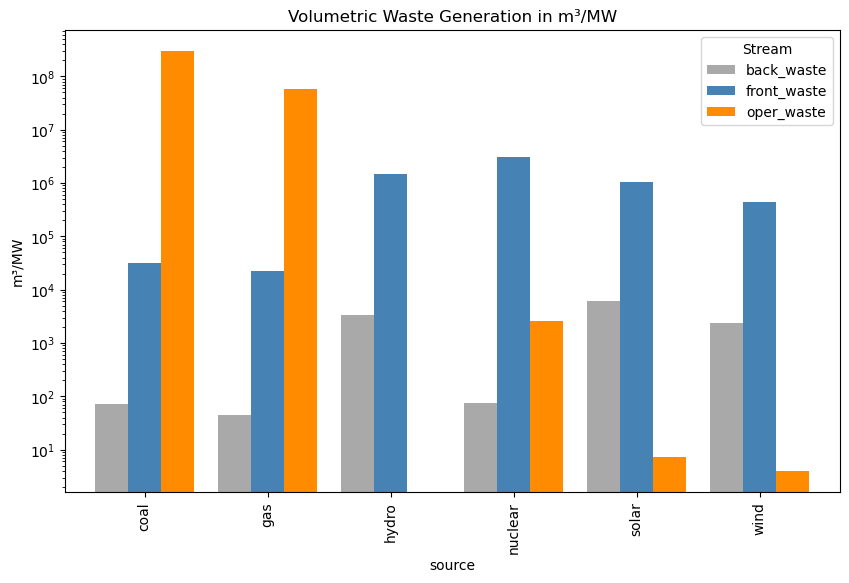

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


# Pivot the DataFrame to have separate columns for 'front_need' and 'oper_need'
total_waste_pivot = total_waste.pivot(index='source', columns='stream', values='m3/MW')

# Plot the bar plot
ax = total_waste_pivot.plot(kind='bar' , color=('darkgray','steelblue','darkorange'), width=0.8, figsize=(10, 6))
ax.set_yscale('log')
# Customize the plot
ax.set_xlabel('source')
ax.set_ylabel('m³/MW')
ax.set_title('Volumetric Waste Generation in m³/MW')
ax.legend(title='Stream')
plt.savefig('Volumetric Waste Generation in m³.tiff', bbox_inches='tight', dpi=650)

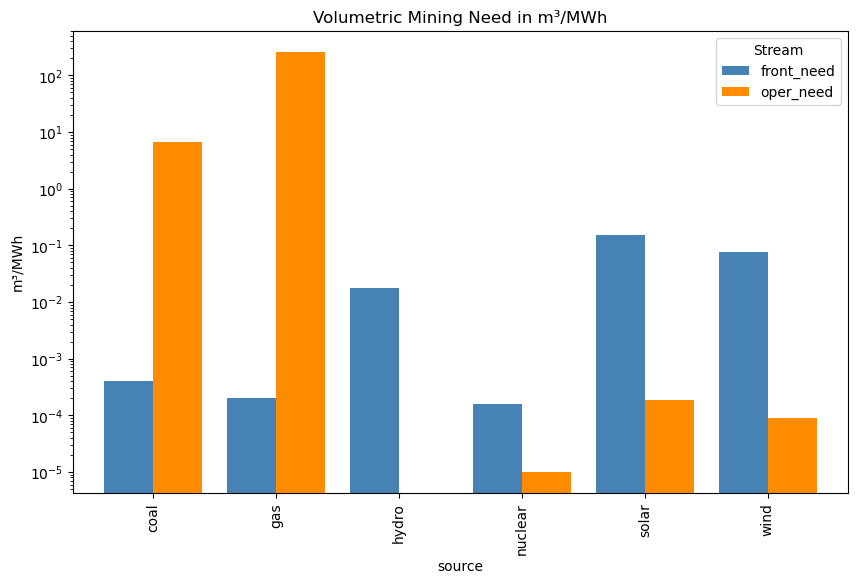

In [23]:
import pandas as pd
import matplotlib.pyplot as plt


# Pivot the DataFrame to have separate columns for 'front_need' and 'oper_need'
total_need_pivot = total_need.pivot(index='source', columns='stream', values='m3/MWh')

# Plot the bar plot
ax = total_need_pivot.plot(kind='bar',color=('steelblue','darkorange'), width=0.8, figsize=(10, 6))
ax.set_yscale('log')
# Customize the plot
ax.set_xlabel('source')
ax.set_ylabel('m³/MWh')
ax.set_title('Volumetric Mining Need in m³/MWh')
ax.legend(title='Stream')

plt.savefig('Volumetric mining need in MWh.tiff', bbox_inches='tight', dpi=650)

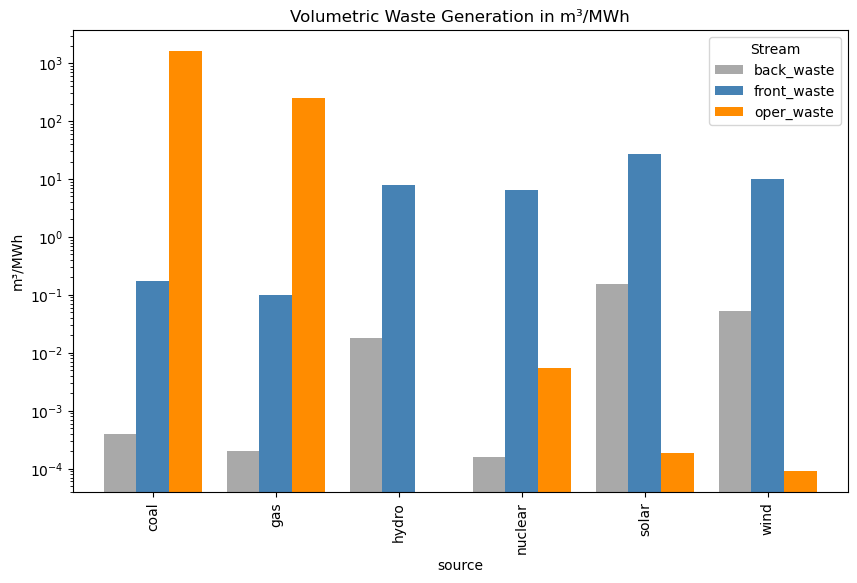

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


# Pivot the DataFrame to have separate columns for 'front_need' and 'oper_need'
total_waste_pivot = total_waste.pivot(index='source', columns='stream', values='m3/MWh')

# Plot the bar plot
ax = total_waste_pivot.plot(kind='bar', color=('darkgray','steelblue','darkorange'), width=0.8, figsize=(10, 6))
ax.set_yscale('log')
# Customize the plot
ax.set_xlabel('source')
ax.set_ylabel('m³/MWh')
ax.set_title('Volumetric Waste Generation in m³/MWh')
ax.legend(title='Stream')

plt.savefig('Volumetric Waste Generation in MWh.tiff', bbox_inches='tight', dpi=650)

In [25]:
!pip install bokeh
from bokeh.plotting import figure, output_file, show

ImportError: cannot import name 'bar' from 'bokeh' (C:\Users\User\anaconda3\lib\site-packages\bokeh\__init__.py)

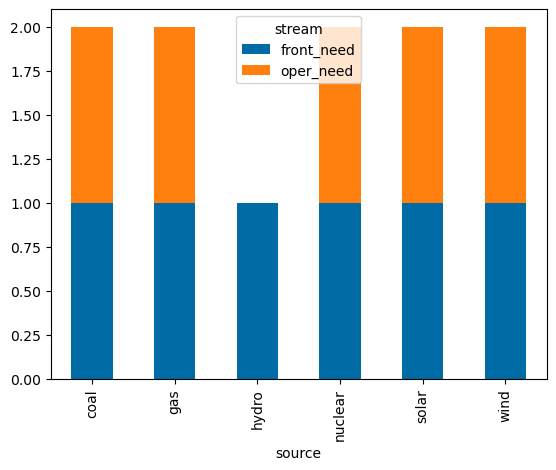

In [26]:
total_need.groupby(["source", "stream"]).size().unstack().plot(kind='bar', stacked=True)
from bokeh import bar, output_file, show

bar = Bar(x, values='source', label='m3/MW', stack='stream',
         title="Number of students enrolled per class",
         legend='top_right',bar_width=1.0)
output_file("myPlot.html")
show(bar)

In [27]:
total_waste_1=energy_s[energy_s['stream'].str.contains('waste')].groupby(["source"],  as_index=False).sum()
total_need_1=energy_s[energy_s['stream'].str.contains('need')].groupby(["source"],  as_index=False).sum()

In [28]:
total_waste_1

source         m3/MW       m3/MWh  location mining  reference mining  \
0     coal  3.005849e+08  1633.962146              0.0               0.0   
1      gas  5.704676e+07   255.379901              0.0               0.0   
2    hydro  1.464937e+06     8.039914              0.0               0.0   
3  nuclear  3.051988e+06     6.451860              0.0               0.0   
4    solar  1.066020e+06    27.042608              0.0               0.0   
5     wind  4.456320e+05    10.174247              0.0               0.0   

   coordinate processing   locaton processing  reference processing  
0                     0.0                 0.0                   0.0  
1                     0.0                 0.0                   0.0  
2                     0.0                 0.0                   0.0  
3                     0.0                 0.0                   0.0  
4                     0.0                 0.0                   0.0  
5                     0.0                 0.0                   0.0

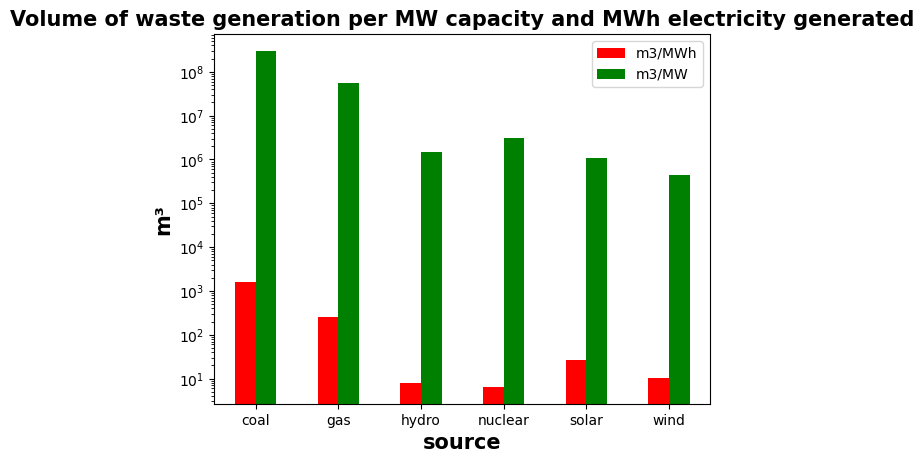

In [29]:
plt.style.use('tableau-colorblind10')
ax = total_waste_1.plot.bar(x='source', y=['m3/MWh',"m3/MW"], color=['red', 'green'], rot=0)
ax.set_yscale('log')
plt.title("Volume of waste generation per MW capacity and MWh electricity generated",fontweight ='bold', fontsize = 15)
plt.ylabel("m³", fontweight ='bold', fontsize = 15)
plt.xlabel("source", fontweight ='bold', fontsize = 15)
ax.set_facecolor('white')

ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.savefig('Volume of waste generated.tiff', bbox_inches='tight', dpi=650)

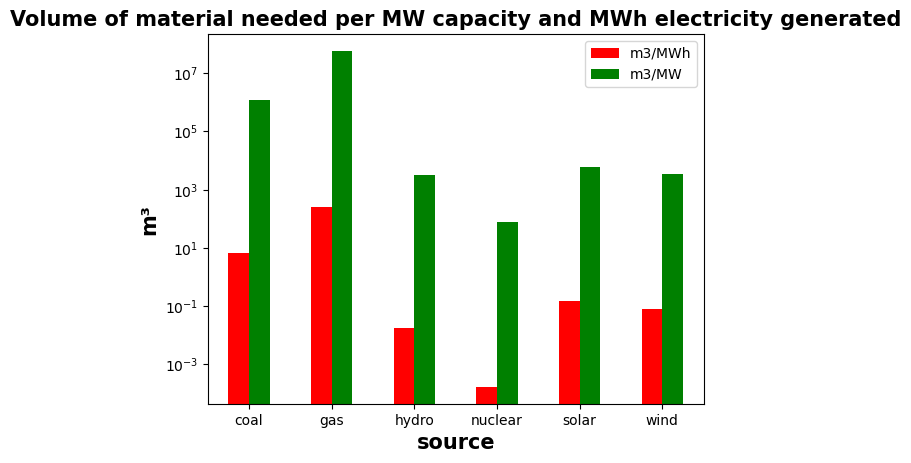

In [30]:
ax = total_need_1.plot.bar(x='source', y=['m3/MWh',"m3/MW"], color=['red', 'green'], rot=0)
ax.set_yscale('log')
plt.title("Volume of material needed per MW capacity and MWh electricity generated",fontweight ='bold', fontsize = 15)
plt.ylabel("m³", fontweight ='bold', fontsize = 15)
plt.xlabel("source", fontweight ='bold', fontsize = 15)
ax.set_facecolor('white')

ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
plt.savefig('Volume of material needed.tiff', bbox_inches='tight', dpi=650)

In [31]:
total_front_need=energy_s[energy_s['stream'].str.match('front_need')].groupby(["source"], as_index=False).sum()
total_front_waste=energy_s[energy_s['stream'].str.match('front_waste')].groupby(["source"], as_index=False).sum()
total_oper_need=energy_s[energy_s['stream'].str.match('oper_need')].groupby(["source"], as_index=False).sum()
total_oper_waste=energy_s[energy_s['stream'].str.match('oper_waste')].groupby(["source"], as_index=False).sum()
total_back_waste=energy_s[energy_s['stream'].str.match('back_waste')].groupby(["source"], as_index=False).sum()
del gen['oil']

In [32]:
type(annual_oper_need)

NameError: name 'annual_oper_need' is not defined

In [33]:
total_front_need


source        m3/MW    m3/MWh  location mining  reference mining  \
0     coal    72.875557  0.000396              0.0               0.0   
1      gas    44.797168  0.000201              0.0               0.0   
2    hydro  3210.022540  0.017617              0.0               0.0   
3  nuclear    74.534679  0.000158              0.0               0.0   
4    solar  6065.704219  0.153874              0.0               0.0   
5     wind  3348.914276  0.076459              0.0               0.0   

   coordinate processing   locaton processing  reference processing  
0                     0.0                 0.0                   0.0  
1                     0.0                 0.0                   0.0  
2                     0.0                 0.0                   0.0  
3                     0.0                 0.0                   0.0  
4                     0.0                 0.0                   0.0  
5                     0.0                 0.0                   0.0

In [34]:
annual_constr_need=constructions*[44.797168, 3348.914276, 74.534679, 3210.022540, 6065.704219]
#annual_constr_need_tot = annual_constr_need.sum(axis=1) #in tons
#annual_constr_need_tot = annual_constr_need_tot.to_frame()
#annual_constr_need_tot.columns = ['constr_need']
annual_constr_need.columns = ['gas_con_need', 'wind_con_need', 'nuclear_con_need','hydro_con_need','solar_con_need']
annual_constr_need

gas_con_need  wind_con_need  nuclear_con_need  hydro_con_need  \
2023    134.391504   13730.548532        163.976294        0.000000   
2024      0.000000   13060.765676          0.000000      321.002254   
2025      0.000000   53247.736988          0.000000        0.000000   
2026      0.000000   65973.611237          0.000000      321.002254   
2027    318.059893   82718.182617          0.000000        0.000000   
2028     53.756602  103481.451128          0.000000        0.000000   
2029    107.513203   91090.468307          0.000000        0.000000   
2030     31.358018   65973.611237          0.000000        0.000000   
2031     40.317451   26121.531353          0.000000        0.000000   
2032     31.358018   15739.897097          0.000000        0.000000   
2033     31.358018   48224.365574          0.000000        0.000000   
2034      0.000000    7702.502835          0.000000        0.000000   
2035      4.479717    3683.805704          0.000000        0.000000   
2036      8.959434    5023.371414          0.000000        0.000000   
2037     44.797168    3348.914276          0.000000        0.000000   
2038     22.398584    3014.022848          0.000000        0.000000   
2039      0.000000    3348.914276          0.000000        0.000000   
2040      0.000000    3683.805704          0.000000        0.000000   
2041      0.000000    1339.565710          0.000000        0.000000   
2042      0.000000    1674.457138          0.000000        0.000000   
2043      0.000000    7702.502835          0.000000        0.000000   
2044      0.000000    6697.828552          0.000000        0.000000   
2045      0.000000    8707.177118          0.000000        0.000000   
2046    147.830654    9042.068545          0.000000      321.002254   
2047     62.716035   13395.657104          0.000000        0.000000   
2048      4.479717   14065.439959          0.000000        0.000000   
2049     67.195752    7032.719980          0.000000        0.000000   
2050     94.074053   11051.417111          0.000000        0.000000   

      solar_con_need  
2023   170446.288554  
2024   213512.788509  
2025   266890.985636  
2026   333007.161623  
2027   275989.541965  
2028   171659.429398  
2029    92805.274551  
2030    72788.450628  
2031   141937.478725  
2032   175298.851929  
2033    97657.837926  
2034   118887.802692  
2035    51558.485862  
2036   124953.506911  
2037    94624.985816  
2038   118281.232270  
2039    52771.626705  
2040    97657.837926  
2041    54591.337971  
2042    87952.711176  
2043   101903.830879  
2044   126773.218177  
2045   159528.020960  
2046   143150.619568  
2047    97657.837926  
2048    84919.859066  
2049   118281.232270  
2050   113428.668895

In [35]:
total_front_waste


source         m3/MW     m3/MWh  location mining  reference mining  \
0     coal  3.220015e+04   0.175039              0.0               0.0   
1      gas  2.228459e+04   0.099761              0.0               0.0   
2    hydro  1.461607e+06   8.021642              0.0               0.0   
3  nuclear  3.049353e+06   6.446291              0.0               0.0   
4    solar  1.059972e+06  26.889192              0.0               0.0   
5     wind  4.432924e+05  10.120831              0.0               0.0   

   coordinate processing   locaton processing  reference processing  
0                     0.0                 0.0                   0.0  
1                     0.0                 0.0                   0.0  
2                     0.0                 0.0                   0.0  
3                     0.0                 0.0                   0.0  
4                     0.0                 0.0                   0.0  
5                     0.0                 0.0                   0.0

In [36]:
annual_constr_waste=constructions*[2.228459e+04, 4.432924e+05, 3.049353e+06, 1.461607e+06, 1.059972e+06]
#annual_constr_waste_tot = annual_constr_waste.sum(axis=1) #in tons
#annual_constr_waste_tot = annual_constr_waste_tot.to_frame()
#annual_constr_waste_tot.columns= ['constr_waste']
annual_constr_waste.columns = ['gas_constr_waste', 'wind_constr_waste', 'nuclear_constr_waste','hydro_constr_waste','solar_constr_waste']
annual_constr_waste

gas_constr_waste  wind_constr_waste  nuclear_constr_waste  \
2023         66853.770         1817498.84             6708576.6   
2024             0.000         1728840.36                   0.0   
2025             0.000         7048349.16                   0.0   
2026             0.000         8732860.28                   0.0   
2027        158220.589        10949322.28                   0.0   
2028         26741.508        13697735.16                   0.0   
2029         53483.016        12057553.28                   0.0   
2030         15599.213         8732860.28                   0.0   
2031         20056.131         3457680.72                   0.0   
2032         15599.213         2083474.28                   0.0   
2033         15599.213         6383410.56                   0.0   
2034             0.000         1019572.52                   0.0   
2035          2228.459          487621.64                   0.0   
2036          4456.918          664938.60                   0.0   
2037         22284.590          443292.40                   0.0   
2038         11142.295          398963.16                   0.0   
2039             0.000          443292.40                   0.0   
2040             0.000          487621.64                   0.0   
2041             0.000          177316.96                   0.0   
2042             0.000          221646.20                   0.0   
2043             0.000         1019572.52                   0.0   
2044             0.000          886584.80                   0.0   
2045             0.000         1152560.24                   0.0   
2046         73539.147         1196889.48                   0.0   
2047         31198.426         1773169.60                   0.0   
2048          2228.459         1861828.08                   0.0   
2049         33426.885          930914.04                   0.0   
2050         46797.639         1462864.92                   0.0   

      hydro_constr_waste  solar_constr_waste  
2023                 0.0          29785213.2  
2024            146160.7          37311014.4  
2025                 0.0          46638768.0  
2026            146160.7          58192462.8  
2027                 0.0          48228726.0  
2028                 0.0          29997207.6  
2029                 0.0          16217571.6  
2030                 0.0          12719664.0  
2031                 0.0          24803344.8  
2032                 0.0          30633190.8  
2033                 0.0          17065549.2  
2034                 0.0          20775451.2  
2035                 0.0           9009762.0  
2036                 0.0          21835423.2  
2037                 0.0          16535563.2  
2038                 0.0          20669454.0  
2039                 0.0           9221756.4  
2040                 0.0          17065549.2  
2041                 0.0           9539748.0  
2042                 0.0          15369594.0  
2043                 0.0          17807529.6  
2044                 0.0          22153414.8  
2045                 0.0          27877263.6  
2046            146160.7          25015339.2  
2047                 0.0          17065549.2  
2048                 0.0          14839608.0  
2049                 0.0          20669454.0  
2050                 0.0          19821476.4

In [37]:
total_oper_need


source         m3/MW      m3/MWh  location mining  reference mining  \
0     coal  1.225358e+06    6.661000              0.0               0.0   
1      gas  5.814806e+07  260.310054              0.0               0.0   
2  nuclear  4.758541e+00    0.000010              0.0               0.0   
3    solar  7.323736e+00    0.000186              0.0               0.0   
4     wind  4.004848e+00    0.000091              0.0               0.0   

   coordinate processing   locaton processing  reference processing  
0                     0.0                 0.0                   0.0  
1                     0.0                 0.0                   0.0  
2                     0.0                 0.0                   0.0  
3                     0.0                 0.0                   0.0  
4                     0.0                 0.0                   0.0

In [38]:
annual_oper_need=gen*1000*[6.661000,260.310054,0.000091,0.000010,0, 0.000186]
#annual_oper_need_tot= annual_oper_need.sum(axis=1) #in tons
#annual_oper_need_tot = annual_oper_need_tot.to_frame()
#annual_oper_need_tot.columns= ['oper_need']
annual_oper_need.columns = ['coal_oper_need', 'gas_oper_need', 'wind_oper_need', 'nuclear_oper_need','hydro_oper_need','solar_oper_need']
annual_oper_need

coal_oper_need  gas_oper_need  wind_oper_need  nuclear_oper_need  \
2022       5541952.0   3.779702e+08         13.1040               7.72   
2023       5222224.0   3.524598e+08         13.4771               7.84   
2024       5488664.0   3.279907e+08         13.8320               7.89   
2025       5029055.0   3.110705e+08         15.2789               7.82   
2026       4309667.0   2.970138e+08         17.0716               7.75   
2027       3656889.0   2.748874e+08         19.3193               7.75   
2028       3017433.0   2.636941e+08         22.1312               7.66   
2029       2557824.0   2.543229e+08         24.6064               7.66   
2030       2298045.0   2.426090e+08         26.3991               7.58   
2031       2238096.0   2.308950e+08         27.1089               7.58   
2032       2218113.0   2.220445e+08         27.5366               7.58   
2033       2278062.0   2.155367e+08         28.8470               7.15   
2034       2264740.0   2.090290e+08         29.0563               7.09   
2035       2264740.0   2.064259e+08         29.1564               7.00   
2036       2244757.0   2.069465e+08         29.2929               6.84   
2037       2184808.0   2.095496e+08         29.3839               6.73   
2038       2104876.0   2.155367e+08         29.4658               6.54   
2039       2058249.0   2.184001e+08         29.5568               6.45   
2040       1998300.0   2.243873e+08         29.6569               6.25   
2041       2011622.0   2.267301e+08         29.6933               6.26   
2042       2011622.0   2.303744e+08         29.7388               6.26   
2043       1984978.0   2.324569e+08         29.9481               6.26   
2044       1911707.0   2.329775e+08         30.1301               6.26   
2045       1858419.0   2.350600e+08         30.3667               6.26   
2046       1791809.0   2.345394e+08         30.6124               6.26   
2047       1758504.0   2.353203e+08         30.9764               6.26   
2048       1691894.0   2.381837e+08         31.3586               6.25   
2049       1678572.0   2.392249e+08         31.5497               6.25   
2050       1618623.0   2.423487e+08         31.8500               6.25   

      hydro_oper_need  solar_oper_need  
2022              0.0          13.9500  
2023              0.0          19.1766  
2024              0.0          25.7238  
2025              0.0          33.9078  
2026              0.0          44.1192  
2027              0.0          52.5822  
2028              0.0          57.8460  
2029              0.0          60.6918  
2030              0.0          62.9238  
2031              0.0          67.2762  
2032              0.0          72.6516  
2033              0.0          75.6462  
2034              0.0          79.2918  
2035              0.0          80.8728  
2036              0.0          84.7044  
2037              0.0          87.6060  
2038              0.0          91.2330  
2039              0.0          92.8512  
2040              0.0          95.8458  
2041              0.0          97.5198  
2042              0.0         100.2168  
2043              0.0         103.3416  
2044              0.0         107.2290  
2045              0.0         112.1208  
2046              0.0         116.5104  
2047              0.0         119.5050  
2048              0.0         122.1090  
2049              0.0         125.7360  
2050              0.0         129.2142

In [39]:
#bil KWh = 1000 000 MWh - numbers will be in 1000 ton/MWh 


In [40]:
total_oper_waste


source         m3/MW       m3/MWh  location mining  reference mining  \
0     coal  3.005526e+08  1633.786711              0.0               0.0   
1      gas  5.702443e+07   255.279940              0.0               0.0   
2  nuclear  2.559760e+03     0.005411              0.0               0.0   
3    solar  7.326842e+00     0.000186              0.0               0.0   
4     wind  4.004848e+00     0.000091              0.0               0.0   

   coordinate processing   locaton processing  reference processing  
0                     0.0                 0.0                   0.0  
1                     0.0                 0.0                   0.0  
2                     0.0                 0.0                   0.0  
3                     0.0                 0.0                   0.0  
4                     0.0                 0.0                   0.0

In [41]:
annual_oper_w=gen*1000*[1633.786711,255.279940,0.000091,0.005411,0,0.000186]
#annual_oper_w_tot= annual_oper_w.sum(axis=1) #in tons
#annual_oper_w_tot= annual_oper_w_tot.to_frame()
#annual_oper_w_tot.columns= ['oper_waste']
annual_oper_w.columns = ['coal_oper_waste', 'gas_oper_waste', 'wind_oper_waste', 'nuclear_oper_waste','hydro_oper_waste','solar_oper_waste']

In [42]:
del decommissions['gas']
del decommissions['hydro']

In [43]:
total_back_waste


source        m3/MW    m3/MWh  location mining  reference mining  \
0     coal    72.788681  0.000396              0.0               0.0   
1      gas    44.739958  0.000200              0.0               0.0   
2    hydro  3329.294842  0.018272              0.0               0.0   
3  nuclear    74.534679  0.000158              0.0               0.0   
4    solar  6040.323723  0.153230              0.0               0.0   
5     wind  2335.623166  0.053325              0.0               0.0   

   coordinate processing   locaton processing  reference processing  
0                     0.0                 0.0                   0.0  
1                     0.0                 0.0                   0.0  
2                     0.0                 0.0                   0.0  
3                     0.0                 0.0                   0.0  
4                     0.0                 0.0                   0.0  
5                     0.0                 0.0                   0.0

In [44]:
annual_decomissions=decommissions*[72.788681,74.534679]
#annual_decomissions_tot= annual_decomissions.sum(axis=1) #in tons
#annual_decomissions_tot=annual_decomissions_tot.to_frame()
#annual_decomissions_tot.columns = ['decom_waste']
annual_decomissions.columns = ['coal_decom_waste', 'nuclear_decom_waste']

In [45]:
tot_annual_flow = pd.concat([annual_constr_need,annual_constr_waste,annual_oper_need, annual_oper_w, annual_decomissions], axis=1)
tot_annual_flow 


gas_con_need  wind_con_need  nuclear_con_need  hydro_con_need  \
2023    134.391504   13730.548532        163.976294        0.000000   
2024      0.000000   13060.765676          0.000000      321.002254   
2025      0.000000   53247.736988          0.000000        0.000000   
2026      0.000000   65973.611237          0.000000      321.002254   
2027    318.059893   82718.182617          0.000000        0.000000   
2028     53.756602  103481.451128          0.000000        0.000000   
2029    107.513203   91090.468307          0.000000        0.000000   
2030     31.358018   65973.611237          0.000000        0.000000   
2031     40.317451   26121.531353          0.000000        0.000000   
2032     31.358018   15739.897097          0.000000        0.000000   
2033     31.358018   48224.365574          0.000000        0.000000   
2034      0.000000    7702.502835          0.000000        0.000000   
2035      4.479717    3683.805704          0.000000        0.000000   
2036      8.959434    5023.371414          0.000000        0.000000   
2037     44.797168    3348.914276          0.000000        0.000000   
2038     22.398584    3014.022848          0.000000        0.000000   
2039      0.000000    3348.914276          0.000000        0.000000   
2040      0.000000    3683.805704          0.000000        0.000000   
2041      0.000000    1339.565710          0.000000        0.000000   
2042      0.000000    1674.457138          0.000000        0.000000   
2043      0.000000    7702.502835          0.000000        0.000000   
2044      0.000000    6697.828552          0.000000        0.000000   
2045      0.000000    8707.177118          0.000000        0.000000   
2046    147.830654    9042.068545          0.000000      321.002254   
2047     62.716035   13395.657104          0.000000        0.000000   
2048      4.479717   14065.439959          0.000000        0.000000   
2049     67.195752    7032.719980          0.000000        0.000000   
2050     94.074053   11051.417111          0.000000        0.000000   
2022           NaN            NaN               NaN             NaN   

      solar_con_need  gas_constr_waste  wind_constr_waste  \
2023   170446.288554         66853.770         1817498.84   
2024   213512.788509             0.000         1728840.36   
2025   266890.985636             0.000         7048349.16   
2026   333007.161623             0.000         8732860.28   
2027   275989.541965        158220.589        10949322.28   
2028   171659.429398         26741.508        13697735.16   
2029    92805.274551         53483.016        12057553.28   
2030    72788.450628         15599.213         8732860.28   
2031   141937.478725         20056.131         3457680.72   
2032   175298.851929         15599.213         2083474.28   
2033    97657.837926         15599.213         6383410.56   
2034   118887.802692             0.000         1019572.52   
2035    51558.485862          2228.459          487621.64   
2036   124953.506911          4456.918          664938.60   
2037    94624.985816         22284.590          443292.40   
2038   118281.232270         11142.295          398963.16   
2039    52771.626705             0.000          443292.40   
2040    97657.837926             0.000          487621.64   
2041    54591.337971             0.000          177316.96   
2042    87952.711176             0.000          221646.20   
2043   101903.830879             0.000         1019572.52   
2044   126773.218177             0.000          886584.80   
2045   159528.020960             0.000         1152560.24   
2046   143150.619568         73539.147         1196889.48   
2047    97657.837926         31198.426         1773169.60   
2048    84919.859066          2228.459         1861828.08   
2049   118281.232270         33426.885          930914.04   
2050   113428.668895         46797.639         1462864.92   
2022             NaN               NaN                NaN   

      nuclear_constr_waste  hydro_constr_was

In [46]:
cummulative_need = tot_annual_flow[["gas_con_need","wind_con_need","nuclear_con_need","hydro_con_need","solar_con_need","gas_constr_waste","wind_constr_waste","nuclear_constr_waste","hydro_constr_waste","solar_constr_waste","coal_oper_need","gas_oper_need","wind_oper_need","nuclear_oper_need","hydro_oper_need","solar_oper_need"]].cumsum()
cummulative_waste = tot_annual_flow[["coal_oper_waste","gas_oper_waste","wind_oper_waste","nuclear_oper_waste","hydro_oper_waste","solar_oper_waste","coal_decom_waste","nuclear_decom_waste"]].cumsum()

In [47]:
flow_n = tot_annual_flow.loc[:, tot_annual_flow.columns.str.contains('need')]
flow_w = tot_annual_flow.loc[:, tot_annual_flow.columns.str.contains('waste')]
flow_n.drop(flow_n.index[-1], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_24344\3592011755.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flow_n.drop(flow_n.index[-1], inplace=True)


In [48]:
flow_w.drop(flow_w.index[-1], inplace=True)
flow_w

C:\Users\User\AppData\Local\Temp\ipykernel_24344\3033503545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flow_w.drop(flow_w.index[-1], inplace=True)


gas_constr_waste  wind_constr_waste  nuclear_constr_waste  \
2023         66853.770         1817498.84             6708576.6   
2024             0.000         1728840.36                   0.0   
2025             0.000         7048349.16                   0.0   
2026             0.000         8732860.28                   0.0   
2027        158220.589        10949322.28                   0.0   
2028         26741.508        13697735.16                   0.0   
2029         53483.016        12057553.28                   0.0   
2030         15599.213         8732860.28                   0.0   
2031         20056.131         3457680.72                   0.0   
2032         15599.213         2083474.28                   0.0   
2033         15599.213         6383410.56                   0.0   
2034             0.000         1019572.52                   0.0   
2035          2228.459          487621.64                   0.0   
2036          4456.918          664938.60                   0.0   
2037         22284.590          443292.40                   0.0   
2038         11142.295          398963.16                   0.0   
2039             0.000          443292.40                   0.0   
2040             0.000          487621.64                   0.0   
2041             0.000          177316.96                   0.0   
2042             0.000          221646.20                   0.0   
2043             0.000         1019572.52                   0.0   
2044             0.000          886584.80                   0.0   
2045             0.000         1152560.24                   0.0   
2046         73539.147         1196889.48                   0.0   
2047         31198.426         1773169.60                   0.0   
2048          2228.459         1861828.08                   0.0   
2049         33426.885          930914.04                   0.0   
2050         46797.639         1462864.92                   0.0   

      hydro_constr_waste  solar_constr_waste  coal_oper_waste  gas_oper_waste  \
2023                 0.0          29785213.2     1.280889e+09    3.456490e+08   
2024            146160.7          37311014.4     1.346240e+09    3.216527e+08   
2025                 0.0          46638768.0     1.233509e+09    3.050595e+08   
2026            146160.7          58192462.8     1.057060e+09    2.912744e+08   
2027                 0.0          48228726.0     8.969489e+08    2.695756e+08   
2028                 0.0          29997207.6     7.401054e+08    2.585986e+08   
2029                 0.0          16217571.6     6.273741e+08    2.494085e+08   
2030                 0.0          12719664.0     5.636564e+08    2.379209e+08   
2031                 0.0          24803344.8     5.489523e+08    2.264333e+08   
2032                 0.0          30633190.8     5.440510e+08    2.177538e+08   
2033                 0.0          17065549.2     5.587551e+08    2.113718e+08   
2034                 0.0          20775451.2     5.554875e+08    2.049898e+08   
2035                 0.0           9009762.0     5.554875e+08    2.024370e+08   
2036                 0.0          21835423.2     5.505861e+08    2.029476e+08   
2037                 0.0          16535563.2     5.358820e+08    2.055004e+08   
2038                 0.0          20669454.0     5.162766e+08    2.113718e+08   
2039                 0.0           9221756.4     5.048401e+08    2.141799e+08   
2040                 0.0          17065549.2     4.901360e+08    2.200513e+08   
2041                 0.0           9539748.0     4.934036e+08    2.223488e+08   
2042                 0.0          15369594.0     4.934036e+08    2.259227e+08   
2043                 0.0          17807529.6     4.868684e+08    2.279650e+08   
2044                 0.0          22153414.8     4.688968e+08    2.284755e+08   
2045                 0.0          27877263.6     4.558265e+08    2.305178e+08   
2046            146160.7          25015339.2     4.394886e+08    2.300072e+08   
2047                 0.0          170

In [49]:
flow_n.columns = flow_n.columns.str.split('_', expand=True)
flow_n  = flow_n.groupby(axis=1, level=0).sum()
flow_n 

coal           gas       hydro     nuclear          solar  \
2023  5222224.0  3.524599e+08    0.000000  171.816294  170465.465154   
2024  5488664.0  3.279907e+08  321.002254    7.890000  213538.512309   
2025  5029055.0  3.110705e+08    0.000000    7.820000  266924.893436   
2026  4309667.0  2.970138e+08  321.002254    7.750000  333051.280823   
2027  3656889.0  2.748877e+08    0.000000    7.750000  276042.124165   
2028  3017433.0  2.636941e+08    0.000000    7.660000  171717.275398   
2029  2557824.0  2.543230e+08    0.000000    7.660000   92865.966351   
2030  2298045.0  2.426090e+08    0.000000    7.580000   72851.374428   
2031  2238096.0  2.308951e+08    0.000000    7.580000  142004.754925   
2032  2218113.0  2.220445e+08    0.000000    7.580000  175371.503529   
2033  2278062.0  2.155368e+08    0.000000    7.150000   97733.484126   
2034  2264740.0  2.090290e+08    0.000000    7.090000  118967.094492   
2035  2264740.0  2.064259e+08    0.000000    7.000000   51639.358662   
2036  2244757.0  2.069465e+08    0.000000    6.840000  125038.211311   
2037  2184808.0  2.095496e+08    0.000000    6.730000   94712.591816   
2038  2104876.0  2.155367e+08    0.000000    6.540000  118372.465270   
2039  2058249.0  2.184001e+08    0.000000    6.450000   52864.477905   
2040  1998300.0  2.243873e+08    0.000000    6.250000   97753.683726   
2041  2011622.0  2.267301e+08    0.000000    6.260000   54688.857771   
2042  2011622.0  2.303744e+08    0.000000    6.260000   88052.927976   
2043  1984978.0  2.324569e+08    0.000000    6.260000  102007.172479   
2044  1911707.0  2.329775e+08    0.000000    6.260000  126880.447177   
2045  1858419.0  2.350600e+08    0.000000    6.260000  159640.141760   
2046  1791809.0  2.345395e+08  321.002254    6.260000  143267.129968   
2047  1758504.0  2.353204e+08    0.000000    6.260000   97777.342926   
2048  1691894.0  2.381837e+08    0.000000    6.250000   85041.968066   
2049  1678572.0  2.392250e+08    0.000000    6.250000  118406.968271   
2050  1618623.0  2.423488e+08    0.000000    6.250000  113557.883095   

               wind  
2023   13744.025632  
2024   13074.597676  
2025   53263.015888  
2026   65990.682837  
2027   82737.501917  
2028  103503.582328  
2029   91115.074707  
2030   66000.010337  
2031   26148.640253  
2032   15767.433697  
2033   48253.212574  
2034    7731.559135  
2035    3712.962104  
2036    5052.664314  
2037    3378.298176  
2038    3043.488648  
2039    3378.471076  
2040    3713.462604  
2041    1369.259010  
2042    1704.195938  
2043    7732.450935  
2044    6727.958652  
2045    8737.543818  
2046    9072.680945  
2047   13426.633504  
2048   14096.798559  
2049    7064.269680  
2050   11083.267111

In [50]:
flow_w.columns = flow_w.columns.str.split('_', expand=True)
flow_w  = flow_w.groupby(axis=1, level=0).sum()

In [51]:
flow_n_r = flow_n[["nuclear", "hydro", "wind", "solar"]]
flow_w_r = flow_w[["nuclear", "hydro", "wind", "solar"]]

In [56]:
flow_n.drop(columns=['gas'], inplace=True)

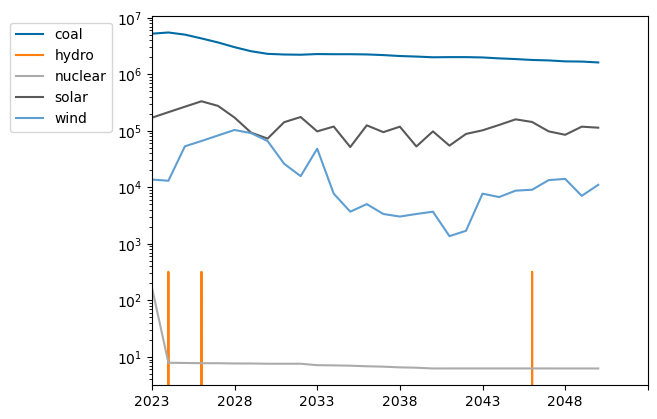

In [57]:
plt.style.use('tableau-colorblind10')
flow_n.plot()
plt.rc('axes')
plt.yscale('log')
plt.xlim([0, 30])
fontsize = 12
#plt.title("Capacity", fontsize = fontsize)
#plt.xlabel("year", fontsize = 10)
#plt.ylabel("GW", fontsize = 10)
plt.legend(bbox_to_anchor=(-0.3, 1), loc='upper left', prop={'size': 10})

#plt.savefig('./plots/flow.jpg', bbox_inches='tight', dpi=900)


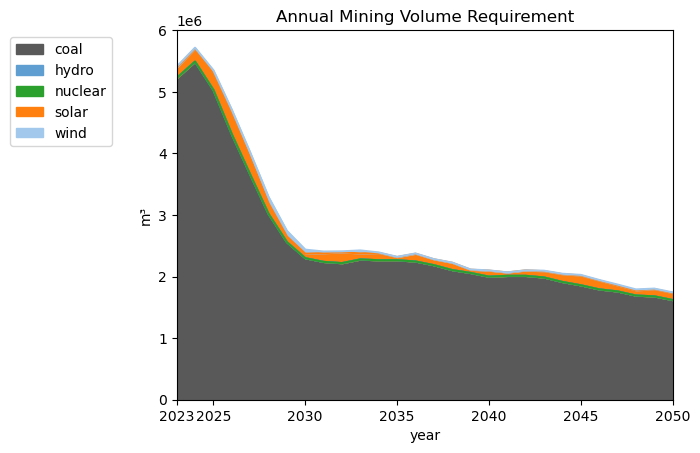

In [58]:
plt.style.use('tableau-colorblind10')
ann_mat_req=flow_n.plot.area(color=('#595959','#5f9ed1','#2ca02c','#ff800e','#a2c8ec'))
plt.rc('axes')
plt.xlim([0, 27])
fontsize = 12
plt.title("Annual Mining Volume Requirement", fontsize = fontsize)
plt.xlabel("year", fontsize = 10)
plt.ylabel("m³", fontsize = 10)
plt.legend(bbox_to_anchor=(-0.35, 1), loc='upper left', prop={'size': 10})
xticks = [0, 2, 7, 12, 17, 22, 27]
xtick_labels = [2023, 2025, 2030, 2035, 2040, 2045, 2050]
plt.xticks(xticks)
ann_mat_req.set_xticklabels(xtick_labels)
plt.savefig('annual_need.tiff', bbox_inches='tight', dpi=650)
plt.show()

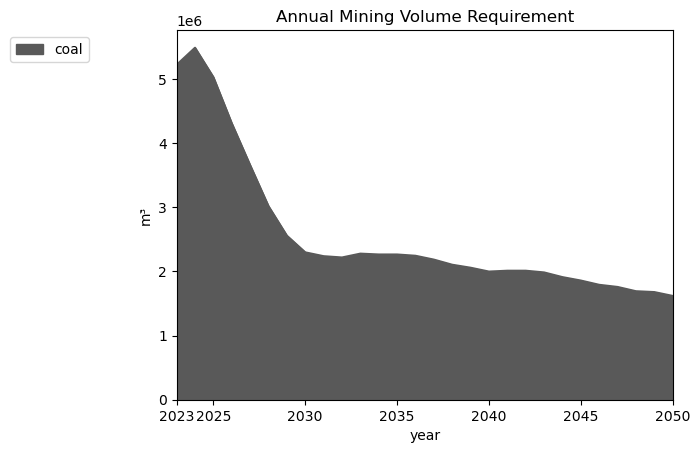

In [54]:
plt.style.use('tableau-colorblind10')
ann_mat_req=flow_n[['coal']].plot.area(color=('#595959'))
plt.rc('axes')
plt.xlim([0, 27])
fontsize = 12
plt.title("Annual Mining Volume Requirement", fontsize = fontsize)
plt.xlabel("year", fontsize = 10)
plt.ylabel("m³", fontsize = 10)
plt.legend(bbox_to_anchor=(-0.35, 1), loc='upper left', prop={'size': 10})
xticks = [0, 2, 7, 12, 17, 22, 27]
xtick_labels = [2023, 2025, 2030, 2035, 2040, 2045, 2050]
plt.xticks(xticks)
ann_mat_req.set_xticklabels(xtick_labels)
plt.savefig('annual_need-coal.tiff', bbox_inches='tight', dpi=650)
plt.show()


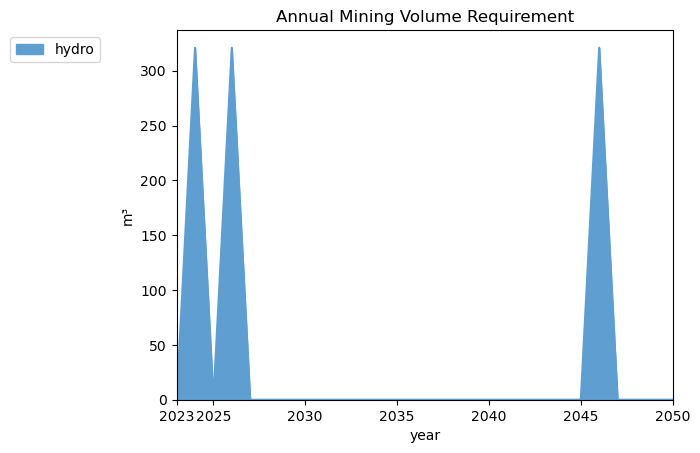

In [55]:
plt.style.use('tableau-colorblind10')
ann_mat_req=flow_n[['hydro']].plot.area(color=('#5f9ed1'))
plt.rc('axes')
plt.xlim([0, 27])
fontsize = 12
plt.title("Annual Mining Volume Requirement", fontsize = fontsize)
plt.xlabel("year", fontsize = 10)
plt.ylabel("m³", fontsize = 10)
plt.legend(bbox_to_anchor=(-0.35, 1), loc='upper left', prop={'size': 10})
xticks = [0, 2, 7, 12, 17, 22, 27]
xtick_labels = [2023, 2025, 2030, 2035, 2040, 2045, 2050]
plt.xticks(xticks)
ann_mat_req.set_xticklabels(xtick_labels)
plt.savefig('annual_need-hydro.tiff', bbox_inches='tight', dpi=650)
plt.show()

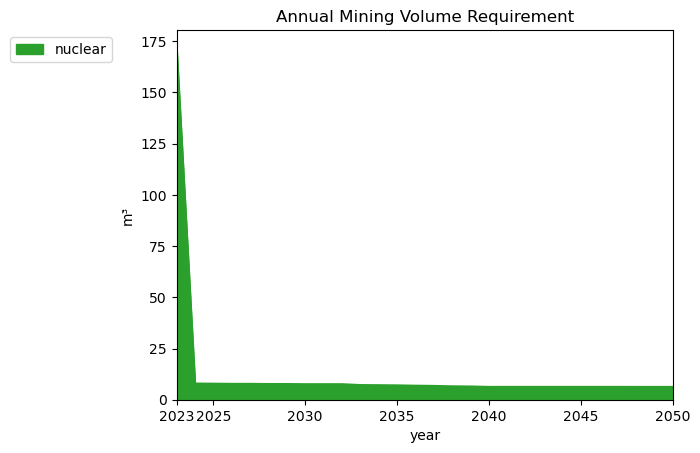

In [56]:
plt.style.use('tableau-colorblind10')
ann_mat_req=flow_n[['nuclear']].plot.area(color=('#2ca02c'))
plt.rc('axes')
plt.xlim([0, 27])
fontsize = 12
plt.title("Annual Mining Volume Requirement", fontsize = fontsize)
plt.xlabel("year", fontsize = 10)
plt.ylabel("m³", fontsize = 10)
plt.legend(bbox_to_anchor=(-0.35, 1), loc='upper left', prop={'size': 10})
xticks = [0, 2, 7, 12, 17, 22, 27]
xtick_labels = [2023, 2025, 2030, 2035, 2040, 2045, 2050]
plt.xticks(xticks)
ann_mat_req.set_xticklabels(xtick_labels)
plt.savefig('annual_need-nuclear.tiff', bbox_inches='tight', dpi=650)
plt.show()

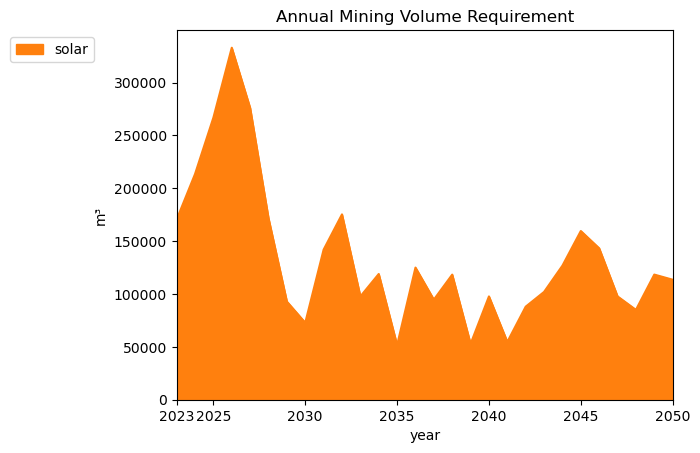

In [57]:
plt.style.use('tableau-colorblind10')
ann_mat_req=flow_n[['solar']].plot.area(color=('#ff800e'))
plt.rc('axes')
plt.xlim([0, 27])
fontsize = 12
plt.title("Annual Mining Volume Requirement", fontsize = fontsize)
plt.xlabel("year", fontsize = 10)
plt.ylabel("m³", fontsize = 10)
plt.legend(bbox_to_anchor=(-0.35, 1), loc='upper left', prop={'size': 10})
xticks = [0, 2, 7, 12, 17, 22, 27]
xtick_labels = [2023, 2025, 2030, 2035, 2040, 2045, 2050]
plt.xticks(xticks)
ann_mat_req.set_xticklabels(xtick_labels)
plt.savefig('annual_need-solar.tiff', bbox_inches='tight', dpi=650)
plt.show()

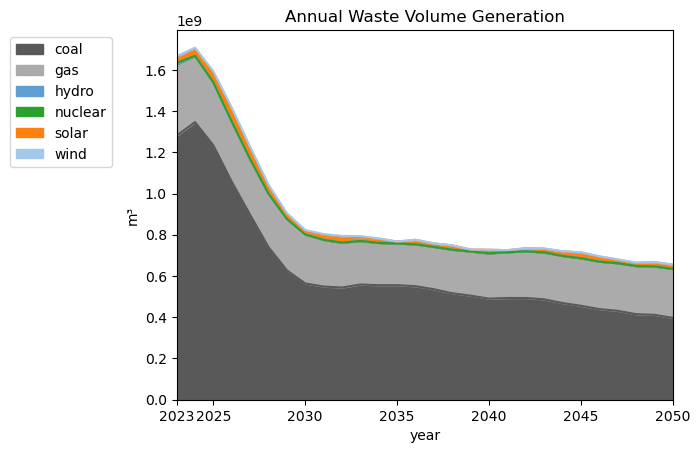

In [58]:
plt.style.use('tableau-colorblind10')
ann_waste_gen=flow_w.plot.area(color=('#595959','#ababab','#5f9ed1','#2ca02c','#ff800e','#a2c8ec'))
plt.rc('axes')
plt.xlim([0, 27])
fontsize = 12
plt.title("Annual Waste Volume Generation", fontsize = fontsize)
plt.xlabel("year", fontsize = 10)
plt.ylabel("m³", fontsize = 10)
plt.legend(bbox_to_anchor=(-0.35, 1), loc='upper left', prop={'size': 10})
xticks = [0, 2, 7, 12, 17, 22, 27]
xtick_labels = [2023, 2025, 2030, 2035, 2040, 2045, 2050]
plt.xticks(xticks)
ann_waste_gen.set_xticklabels(xtick_labels)
plt.savefig('annual_waste.tiff', bbox_inches='tight', dpi=650)
plt.show()


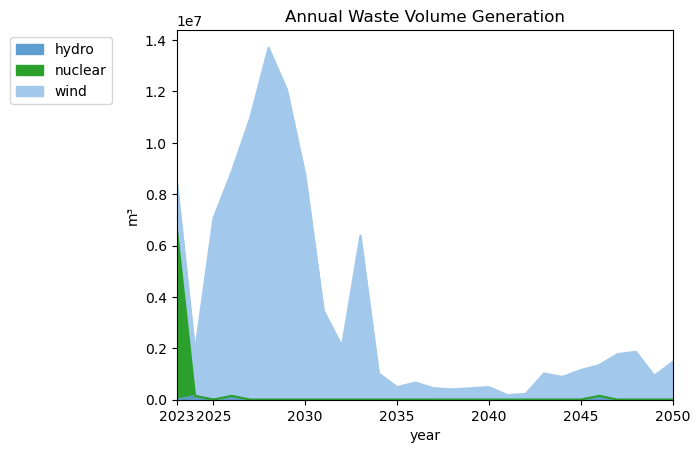

In [59]:
plt.style.use('tableau-colorblind10')
ann_waste_gen=flow_w[['hydro','nuclear','wind']].plot.area(color=('#5f9ed1','#2ca02c','#a2c8ec'))
plt.rc('axes')
plt.xlim([0, 27])
fontsize = 12
plt.title("Annual Waste Volume Generation", fontsize = fontsize)
plt.xlabel("year", fontsize = 10)
plt.ylabel("m³", fontsize = 10)
plt.legend(bbox_to_anchor=(-0.35, 1), loc='upper left', prop={'size': 10})
xticks = [0, 2, 7, 12, 17, 22, 27]
xtick_labels = [2023, 2025, 2030, 2035, 2040, 2045, 2050]
plt.xticks(xticks)
ann_waste_gen.set_xticklabels(xtick_labels)
plt.savefig('annual_waste_hns.tiff', bbox_inches='tight', dpi=650)
plt.show()
 

FileNotFoundError: [Errno 2] No such file or directory: './plots/annual_need_green.tiff'

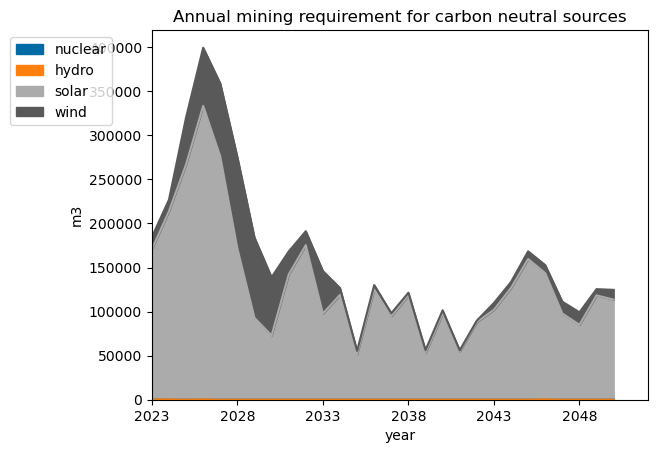

In [60]:
plt.style.use('tableau-colorblind10')
flow_n[["nuclear", "hydro", "solar", "wind"]].plot.area()
plt.rc('axes')
plt.xlim([0, 29])
fontsize = 12
plt.title("Annual mining requirement for carbon neutral sources", fontsize = fontsize)
plt.xlabel("year", fontsize = 10)
plt.ylabel("m3", fontsize = 10)
plt.legend(bbox_to_anchor=(-0.3, 1), loc='upper left', prop={'size': 10})
plt.savefig('./plots/annual_need_green.tiff', bbox_inches='tight', dpi=650)

FileNotFoundError: [Errno 2] No such file or directory: './plots/annual_waste_green.tiff'

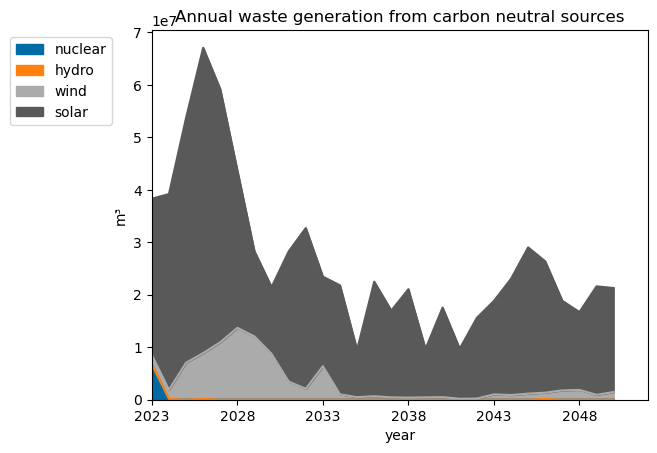

In [61]:
plt.style.use('tableau-colorblind10')
flow_w_r.plot.area()
plt.rc('axes')
plt.xlim([0, 29])
fontsize = 12
plt.title("Annual waste generation from carbon neutral sources", fontsize = fontsize)
plt.xlabel("year", fontsize = 10)
plt.ylabel("m³", fontsize = 10)
plt.legend(bbox_to_anchor=(-0.3, 1), loc='upper left', prop={'size': 10})

plt.savefig('./plots/annual_waste_green.tiff', bbox_inches='tight', dpi=650)

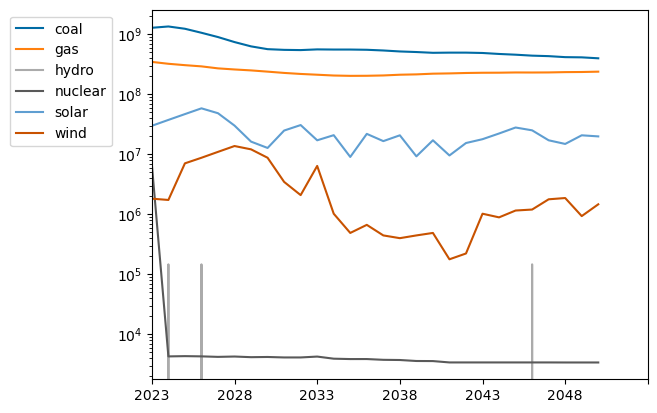

In [62]:
plt.style.use('tableau-colorblind10')
flow_w.plot()
plt.rc('axes')
plt.yscale('log')
plt.xlim([0, 30])
fontsize = 12
#plt.title("Capacity", fontsize = fontsize)
#plt.xlabel("year", fontsize = 10)
#plt.ylabel("GW", fontsize = 10)
plt.legend(bbox_to_anchor=(-0.3, 1), loc='upper left', prop={'size': 10})

#plt.savefig('./plots/flow.jpg', bbox_inches='tight', dpi=900)

In [63]:
total_front_waste=energy_s[energy_s['stream'].str.match('front_waste')]
total_back_waste=energy_s[energy_s['stream'].str.match('back_waste')]
total_oper_waste=energy_s[energy_s['stream'].str.match('oper_waste')]
total_front_need=energy_s[energy_s['stream'].str.match('front_need')]
total_back_need=energy_s[energy_s['stream'].str.match('back_need')]
total_oper_need=energy_s[energy_s['stream'].str.match('oper_need')]

In [64]:
mats = energy_s['material'].unique()
len(mats)

97

In [65]:
energy_s_front_need=energy_s[energy_s['stream'].str.match('front_need')]
energy_s_front_waste=energy_s[energy_s['stream'].str.match('front_waste')]
energy_s_back_waste =energy_s[energy_s['stream'].str.match('back_waste')]

In [66]:
plotdata= energy_s_front_need
plotdata.head(2)

source      stream  material      m3/MW        m3/MWh  \
0   coal  front_need  aluminum   0.154613  8.400000e-07   
2   coal  front_need  concrete  66.149167  3.595850e-04   

  coordinate mining site  location mining  reference mining  \
0     (58.1415,-133.737)              NaN               NaN   
2     (57.6861,-152.895)              NaN               NaN   

   coordinate processing   locaton processing  reference processing  
0                     NaN                 NaN                   NaN  
2                     NaN                 NaN                   NaN

In [67]:
cm = plt.get_cmap('nipy_spectral')
gas = energy_s_front_need[energy_s_front_need["source"].str.match('gas')]
gas

source      stream  material      m3/MW        m3/MWh  \
155    gas  front_need  aluminum   0.075277  3.370000e-07   
175    gas  front_need  concrete  40.728750  1.823290e-04   
176    gas  front_need      iron   3.993141  1.790000e-05   

    coordinate mining site  location mining  reference mining  \
155     (31.0069,-88.0103)              NaN               NaN   
175     (31.0069,-88.0103)              NaN               NaN   
176     (31.0069,-88.0103)              NaN               NaN   

     coordinate processing   locaton processing  reference processing  
155                     NaN                 NaN                   NaN  
175                     NaN                 NaN                   NaN  
176                     NaN                 NaN                   NaN

In [68]:
import plotly.express as px
 
fn = energy_s_front_need

fig = px.bar(fn, x="source", y="m3/MW", color="material",
            hover_data=['source'], barmode = 'stack')
 
fig.show()

In [69]:
import plotly.express as px
 
fw= energy_s_front_waste

fig = px.bar(fw, x="source", y="m3/MW", color="material",
            hover_data=['source'], barmode = 'stack')
 
fig.show()

In [70]:
bw= energy_s_back_waste

fig = px.bar(bw, x="source", y="m3/MW", color="material",
            hover_data=['source'], barmode = 'stack')
 
fig.show()

In [71]:
energy_s_front_need_m = fn.groupby(["source","material"]).size().unstack(level=0)

In [72]:
energy_s_front_waste_m = fw.groupby(["source","material"]).size().unstack(level=0)

In [73]:
fnMW=energy_s_front_need[['material','source','m3/MW']]
fn_MWh=energy_s_front_need[['material','source','m3/MWH']]

KeyError: "['m3/MWH'] not in index"

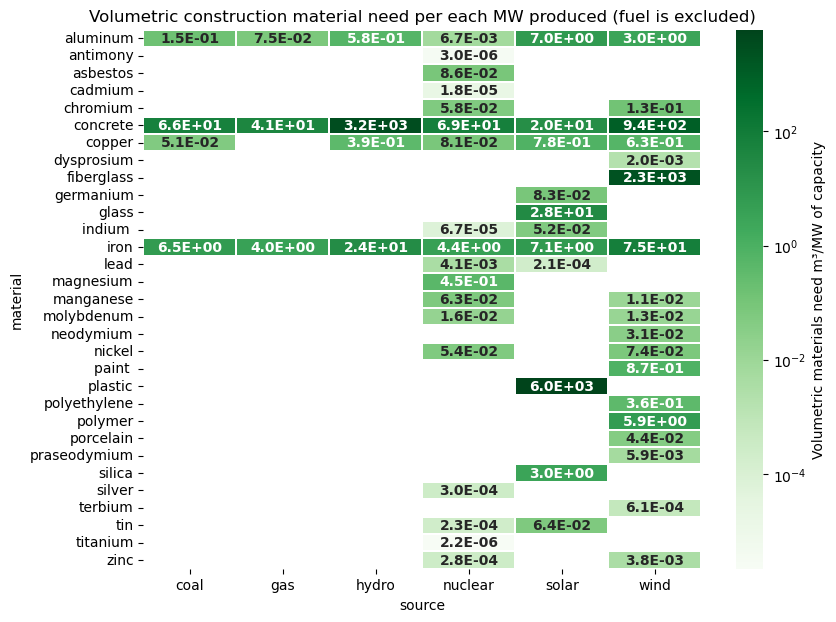

In [74]:
from matplotlib.colors import LogNorm, Normalize

#plt.style.use('tableau-colorblind10')


plt.figure(figsize=(9,7))
fn1=energy_s_front_need.pivot(index='material', columns='source', values='m3/MW')

sns.heatmap(fn1,  annot=True, fmt='.1E', xticklabels=True, yticklabels=True,cmap = 'Greens', cbar_kws={'label': 'Volumetric materials need m³/MW of capacity'}, norm=LogNorm(), linewidth=0.01, annot_kws={
                'fontsize': 10,
                'fontweight': 'bold'
            })
plt.title("Volumetric construction material need per each MW produced (fuel is excluded)")
plt.savefig('front_need_MW_heatmap_n.tiff', bbox_inches='tight', dpi=650)

In [75]:
from matplotlib.colors import LogNorm, Normalize

#plt.style.use('tableau-colorblind10')


plt.figure(figsize=(9,7))
fn1=energy_s_front_need.pivot(index='material', columns='source', values='m3/MWH')

sns.heatmap(fn1,  annot=True, fmt='.1E', xticklabels=True, yticklabels=True,cmap = 'Greens', cbar_kws={'label': 'Volumetric materials need m³/MWh of generated electricity'}, norm=LogNorm(), linewidth=0.01, annot_kws={
                'fontsize': 10,
                'fontweight': 'bold'
            })
plt.title("volumetric construction material need per each MWh produced (fuel is excluded)")
plt.savefig('front_need_MWh_heatmap_n.tiff', bbox_inches='tight', dpi=650)

KeyError: 'm3/MWH'

<Figure size 900x700 with 0 Axes>

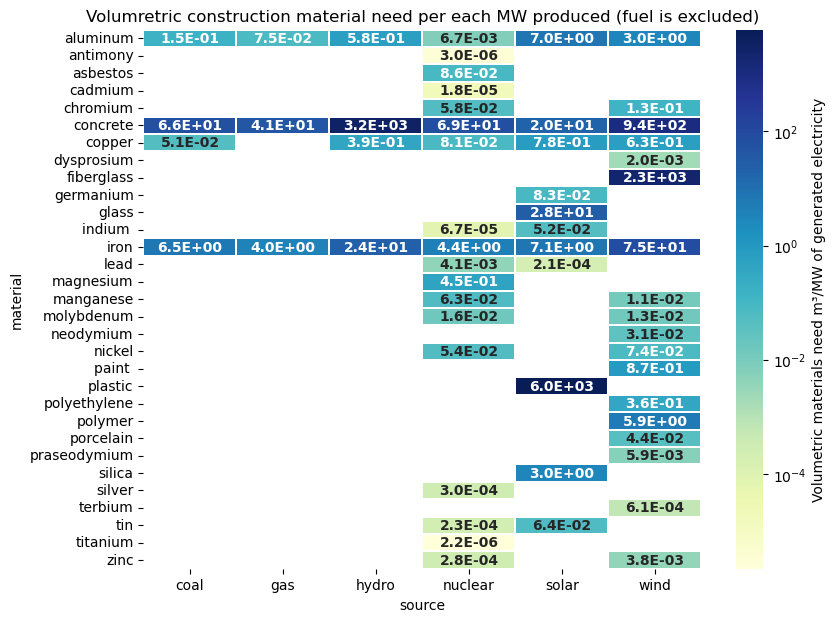

In [76]:
from matplotlib.colors import LogNorm, Normalize

plt.figure(figsize=(9,7))
fn1=energy_s_front_need.pivot(index='material', columns='source', values='m3/MW')

sns.heatmap(fn1,  annot=True, fmt='.1E', xticklabels=True, yticklabels=True, cmap="YlGnBu", cbar_kws={'label': 'Volumetric materials need m³/MW of generated electricity'}, norm=LogNorm(), linewidth=0.01, annot_kws={
                'fontsize': 10,
                'fontweight': 'bold'
            })
plt.title("Volumretric construction material need per each MW produced (fuel is excluded)")
plt.savefig('front_need_MW_heatmap.tiff', bbox_inches='tight')

In [77]:
from matplotlib.colors import LogNorm, Normalize

plt.figure(figsize=(9,7))
fn2=energy_s_front_need.pivot(index='material', columns='source', values='m3/MWH')

sns.heatmap(fn2,  annot=True, fmt='.1E', xticklabels=True, yticklabels=True, cmap="YlGnBu", cbar_kws={'label': 'Volumetric materials need m³/MWh of generated electricity'}, norm=LogNorm(), linewidth=0.01, annot_kws={
                'fontsize': 10,
                'fontweight': 'bold'
            })
plt.title("Volumetric construction material need per each MWh produced (fuel is excluded)")
plt.savefig('front_need_MWh_heatmap.tiff', bbox_inches='tight')

KeyError: 'm3/MWH'

<Figure size 900x700 with 0 Axes>

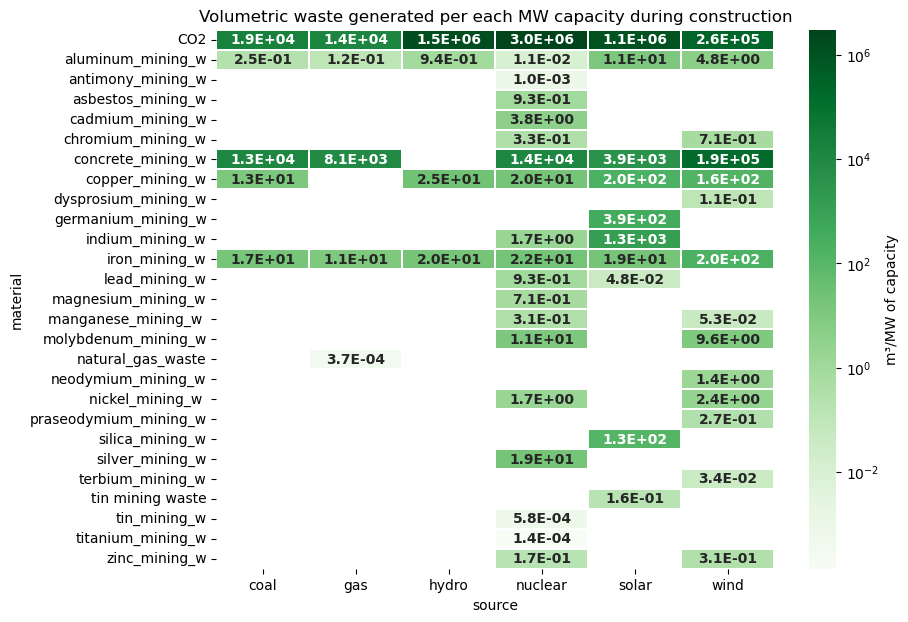

In [78]:
plt.figure(figsize=(9,7))

#plt.style.use('tableau-colorblind10')

fw1=fw.pivot(index='material', columns='source', values='m3/MW')

sns.heatmap(fw1,  annot=True, fmt='.1E',cmap = 'Greens', cbar_kws={'label': 'm³/MW of capacity'},
            norm=LogNorm(), linewidth=0.01, annot_kws={
                'fontsize': 10,
                'fontweight': 'bold'
            })
plt.title("Volumetric waste generated per each MW capacity during construction")
plt.savefig('front_waste_heatmap_n.tiff', bbox_inches='tight', dpi=650)

In [79]:
plt.figure(figsize=(9,7))
df1=energy_s_front_waste.pivot(index='material', columns='source', values='m3/MWH')

sns.heatmap(df1,  annot=True, fmt='.1E', cmap="YlGnBu", cbar_kws={'label': 'm³/MWh of generated electricity'},
            norm=LogNorm(), linewidth=0.2)
plt.title("Volumetric construction waste generated per each MWh produced (fuel is excluded)")
plt.savefig('front_wasteMWh_heatmap_1.tiff', bbox_inches='tight', dpi=650)

KeyError: 'm3/MWH'

<Figure size 900x700 with 0 Axes>

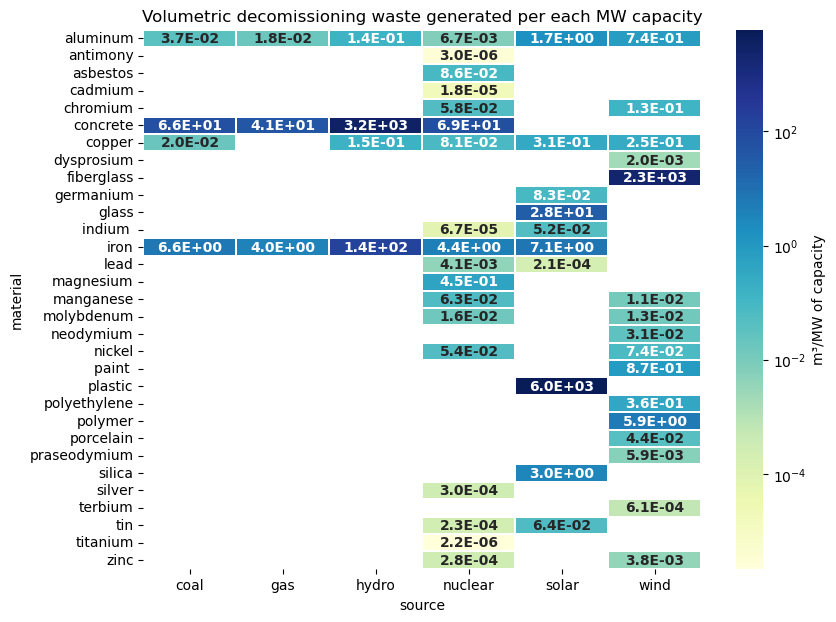

In [80]:
plt.figure(figsize=(9,7))
df1=energy_s_back_waste.pivot(index='material', columns='source', values='m3/MW')

sns.heatmap(df1,  annot=True, fmt='.1E', cmap="YlGnBu", cbar_kws={'label': 'm³/MW of capacity'},
            norm=LogNorm(), linewidth=0.01, annot_kws={
                'fontsize': 10,
                'fontweight': 'bold'
            })
plt.title("Volumetric decomissioning waste generated per each MW capacity")
plt.savefig('back_wasteMW_heatmap.tiff', bbox_inches='tight')

In [81]:
plt.figure(figsize=(9,7))
df1=energy_s_back_waste.pivot(index='material', columns='source', values='m3/MWH')
sns.heatmap(df1,  annot=True, fmt='.1E', cmap="YlGnBu", cbar_kws={'label': 'm³/MWh of generating capacity'},
            norm=LogNorm(), linewidth=0.01, annot_kws={
                'fontsize': 10,
                'fontweight': 'bold'
            })
plt.title("Volumetric Decomissioning waste generated per each MWh produced")
plt.savefig('back_waste_heatmapMWH.tiff', bbox_inches='tight')

KeyError: 'm3/MWH'

<Figure size 900x700 with 0 Axes>

In [82]:
needed_i = np.array(energy_s_front_waste["source"].drop_duplicates()) 
columns = np.array(energy_s_front_waste["material"].drop_duplicates())
needed_i = np.array(energy_s[energy_s['stream'].str.match('front_waste')]["source"].drop_duplicates())
columns = np.array(energy_s[energy_s['stream'].str.match('front_waste')]["material"].drop_duplicates())
df=energy_s[energy_s['stream'].str.match('front_waste')].pivot(index='material', columns='source', values='m3/MW')
df =df.fillna(0).astype(np.int64)
df_front_waste =energy_s_front_waste.pivot(index='material', columns='source', values='m3/MW').fillna(0)
df_back_waste =energy_s_back_waste.pivot(index='material', columns='source', values='m3/MW').fillna(0)
df_front_need =energy_s_front_need.pivot(index='material', columns='source', values='m3/MW').fillna(0)
total_change=elec_gen.agg(lambda x: x.iat[-1] - x.iat[0]).reset_index(name='diff')
total_change.columns=['source',"total change"]
total_change["total change"]=total_change["total change"].astype(float)
tot_constructions = total_change[(total_change["total change"] > 0)]
tot_decom = total_change[(total_change["total change"] < 0)]
tot_decom=tot_decom.T
tot_decom

0        3     5
source         coal  nuclear   oil
total change -128.0    -18.9 -21.0

In [83]:
tot_constructions

source  total change
1    gas          22.4
2   wind         206.0
4  hydro           0.2
6  solar         619.7

In [84]:
two_year= elec_gen.iloc[[0, 28],:]
two_year

coal    gas   wind  nuclear  hydro   oil  solar
2022  197.8  257.8  144.0     94.8   79.2  74.2   75.0
2050   69.8  280.2  350.0     75.9   79.4  53.2  694.7

In [85]:
two_year["hydro"][0]* df_front_waste["hydro"]

material
CO2                      1.157557e+08
aluminum_mining_w        7.454115e+01
antimony_mining_w        0.000000e+00
asbestos_mining_w        0.000000e+00
cadmium_mining_w         0.000000e+00
chromium_mining_w        0.000000e+00
concrete_mining_w        0.000000e+00
copper_mining_w          1.950656e+03
dysprosium_mining_w      0.000000e+00
germanium_mining_w       0.000000e+00
indium_mining_w          0.000000e+00
iron_mining_w            1.608692e+03
lead_mining_w            0.000000e+00
magnesium_mining_w       0.000000e+00
manganese_mining_w       0.000000e+00
molybdenum_mining_w      0.000000e+00
natural_gas_waste        0.000000e+00
neodymium_mining_w       0.000000e+00
nickel_mining_w          0.000000e+00
praseodymium_mining_w    0.000000e+00
silica_mining_w          0.000000e+00
silver_mining_w          0.000000e+00
terbium_mining_w         0.000000e+00
tin mining waste         0.000000e+00
tin_mining_w             0.000000e+00
titanium_mining_w        0.000000e+00
zin

In [86]:
front_w2020=[]
front_w2025=[]
front_n2025=[]
back_w2025=[]

front_n2020=[]
back_w2020=[]
for i in needed_i:

    fw2020 =df_front_waste[str(i)]*two_year[str(i)][0]
    bw2020 = df_back_waste[str(i)]*two_year[str(i)][0]
    fn2020 = df_front_need[str(i)]*two_year[str(i)][0]
    fw2025 =df_front_waste[str(i)]*two_year[str(i)][1]
    bw2025 = df_back_waste[str(i)]*two_year[str(i)][1]
    fn2025 = df_front_need[str(i)]*two_year[str(i)][1]

    front_w2020.append(fw2020)
    front_n2020.append(fn2020)
    back_w2020.append(bw2020)
    front_w2025.append(fw2025)
    front_n2025.append(fn2025)
    back_w2025.append(bw2025)
    
front_w2020= pd.concat(front_w2020, axis=1)
front_n2020= pd.concat(front_n2020, axis=1)
back_w2020= pd.concat(back_w2020, axis=1)
front_w2025= pd.concat(front_w2025, axis=1)
front_n2025= pd.concat(front_n2025, axis=1)
back_w2025= pd.concat(back_w2025, axis=1)

In [87]:
diff_front_w2025 = front_w2025 - front_w2020
diff_front_n2025 = front_n2025 - front_n2020
diff_back_w2025 =back_w2025 - back_w2020
constr_need = diff_front_n2025[["wind", "hydro", "solar","gas"]]  
constr_waste = diff_front_w2025[["wind", "hydro", "solar", "gas"]] 
decom = abs(diff_back_w2025[["coal", "nuclear"]])  

In [88]:
constr_need.reset_index()
constr_need = constr_need.T
constr_need

material     aluminum  antimony  asbestos  cadmium   chromium       concrete  \
wind       610.155277       0.0       0.0      0.0  25.987692  192816.000000   
hydro        0.116990       0.0       0.0      0.0   0.000000     637.000000   
solar     4344.760148       0.0       0.0      0.0   0.000000   12135.791665   
gas          1.686199       0.0       0.0      0.0   0.000000     912.324000   

material      copper  dysprosium  fiberglass  germanium  ...  polyethylene  \
wind      129.218503    0.409591    479403.2   0.000000  ...     73.756956   
hydro       0.077227    0.000000         0.0   0.000000  ...      0.000000   
solar     484.140625    0.000000         0.0  51.224497  ...      0.000000   
gas         0.000000    0.000000         0.0   0.000000  ...      0.000000   

material   polymer  porcelain  praseodymium       silica  silver   terbium  \
wind      1212.928   8.999534      1.217134     0.000000     0.0  0.125152   
hydro        0.000   0.000000      0.000000     0.000000     0.0  0.000000   
solar        0.000   0.000000      0.000000  1869.784483     0.0  0.000000   
gas          0.000   0.000000      0.000000     0.000000     0.0  0.000000   

material        tin  titanium      zinc  
wind       0.000000       0.0  0.779139  
hydro      0.000000       0.0  0.000000  
solar     39.382883       0.0  0.000000  
gas        0.000000       0.0  0.000000  

[4 rows x 31 columns]

In [89]:
constr_waste.reset_index()
constr_waste = constr_waste.T
constr_waste

material           CO2  aluminum_mining_w  antimony_mining_w  \
wind      5.307529e+07         981.734148                0.0   
hydro     2.923123e+05           0.188235                0.0   
solar     6.531704e+08        6990.678538                0.0   
gas       3.183517e+05           2.713079                0.0   

material  asbestos_mining_w  cadmium_mining_w  chromium_mining_w  \
wind                    0.0               0.0         147.222811   
hydro                   0.0               0.0           0.000000   
solar                   0.0               0.0           0.000000   
gas                     0.0               0.0           0.000000   

material  concrete_mining_w  copper_mining_w  dysprosium_mining_w  \
wind           3.816536e+07     32604.650288            23.486763   
hydro          0.000000e+00         4.925899             0.000000   
solar          2.402118e+06    122159.252885             0.000000   
gas            1.805824e+05         0.000000             0.000000   

material  germanium_mining_w  ...  neodymium_mining_w  nickel_mining_w   \
wind                0.000000  ...           298.42005        487.747437   
hydro               0.000000  ...             0.00000          0.000000   
solar          240521.472617  ...             0.00000          0.000000   
gas                 0.000000  ...             0.00000          0.000000   

material  praseodymium_mining_w  silica_mining_w  silver_mining_w  \
wind                  55.262972         0.000000              0.0   
hydro                  0.000000         0.000000              0.0   
solar                  0.000000     79403.847514              0.0   
gas                    0.000000         0.000000              0.0   

material  terbium_mining_w  tin mining waste  tin_mining_w  titanium_mining_w  \
wind              6.907872           0.00000           0.0                0.0   
hydro             0.000000           0.00000           0.0                0.0   
solar             0.000000         101.30006           0.0                0.0   
gas               0.000000           0.00000           0.0                0.0   

material  zinc_mining_w  
wind          63.438324  
hydro          0.000000  
solar          0.000000  
gas            0.000000  

[4 rows x 27 columns]

In [90]:
decom.reset_index()
decom = decom.T
decom

material  aluminum  antimony  asbestos   cadmium  chromium     concrete  \
coal      4.749697  0.000000   0.00000  0.000000  0.000000  8467.093334   
nuclear   0.126023  0.000057   1.63296  0.000348  1.096597  1309.995776   

material    copper  dysprosium  fiberglass  germanium  ...  polyethylene  \
coal      2.594286         0.0         0.0        0.0  ...           0.0   
nuclear   1.530795         0.0         0.0        0.0  ...           0.0   

material  polymer  porcelain  praseodymium  silica    silver  terbium  \
coal          0.0        0.0           0.0     0.0  0.000000      0.0   
nuclear       0.0        0.0           0.0     0.0  0.005621      0.0   

material       tin  titanium      zinc  
coal      0.000000  0.000000  0.000000  
nuclear   0.004254  0.000042  0.005352  

[2 rows x 31 columns]

In [91]:
import copy
newdf1 = copy.deepcopy(constr_waste)
for i in list(constr_waste):
    if sum(constr_waste[i]) == 0:
        newdf1 = newdf1.drop(i, axis=1)
newdf1

material           CO2  aluminum_mining_w  chromium_mining_w  \
wind      5.307529e+07         981.734148         147.222811   
hydro     2.923123e+05           0.188235           0.000000   
solar     6.531704e+08        6990.678538           0.000000   
gas       3.183517e+05           2.713079           0.000000   

material  concrete_mining_w  copper_mining_w  dysprosium_mining_w  \
wind           3.816536e+07     32604.650288            23.486763   
hydro          0.000000e+00         4.925899             0.000000   
solar          2.402118e+06    122159.252885             0.000000   
gas            1.805824e+05         0.000000             0.000000   

material  germanium_mining_w  indium_mining_w  iron_mining_w  lead_mining_w  \
wind                0.000000         0.000000   40921.875156       0.000000   
hydro               0.000000         0.000000       4.062354       0.000000   
solar          240521.472617    831141.727378   11722.922495      29.785877   
gas                 0.000000         0.000000     237.886227       0.000000   

material  manganese_mining_w   molybdenum_mining_w  natural_gas_waste  \
wind                10.870808          1976.625627           0.000000   
hydro                0.000000             0.000000           0.000000   
solar                0.000000             0.000000           0.000000   
gas                  0.000000             0.000000           0.008252   

material  neodymium_mining_w  nickel_mining_w   praseodymium_mining_w  \
wind               298.42005        487.747437              55.262972   
hydro                0.00000          0.000000               0.000000   
solar                0.00000          0.000000               0.000000   
gas                  0.00000          0.000000               0.000000   

material  silica_mining_w  terbium_mining_w  tin mining waste  zinc_mining_w  
wind             0.000000          6.907872           0.00000      63.438324  
hydro            0.000000          0.000000           0.00000       0.000000  
solar        79403.847514          0.000000         101.30006       0.000000  
gas              0.000000          0.000000           0.00000       0.000000

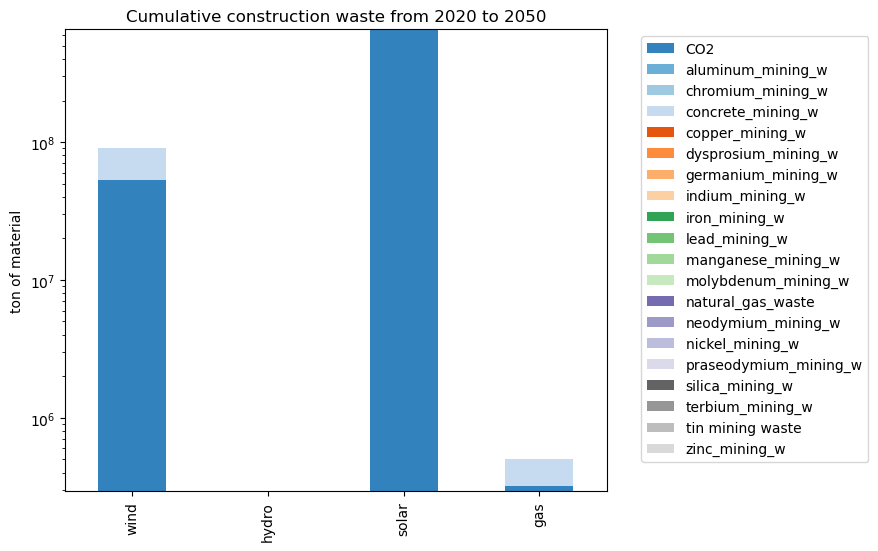

In [92]:
plt.style.use('tableau-colorblind10')
newdf1.plot(kind="bar", stacked=True, colormap = "tab20c", figsize=(7,6))
plt.title("Cumulative construction waste from 2020 to 2050")
# plt.xlabel("electricity source")
plt.ylabel("ton of material")
#plt.yscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.savefig('./plots/waste_const_cumulative.jpg', bbox_inches='tight')

In [93]:
newdf2 = copy.deepcopy(decom)
for i in list(decom):
    if sum(decom[i]) == 0:
        newdf2 = newdf2.drop(i, axis=1)
newdf2

material  aluminum  antimony  asbestos   cadmium  chromium     concrete  \
coal      4.749697  0.000000   0.00000  0.000000  0.000000  8467.093334   
nuclear   0.126023  0.000057   1.63296  0.000348  1.096597  1309.995776   

material    copper   indium         iron      lead  magnesium  manganese  \
coal      2.594286  0.000000  842.513833  0.000000   0.000000   0.000000   
nuclear   1.530795  0.001266   83.210629  0.077736   8.498266   1.188843   

material  molybdenum    nickel    silver       tin  titanium      zinc  
coal        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
nuclear     0.303252  1.027619  0.005621  0.004254  0.000042  0.005352

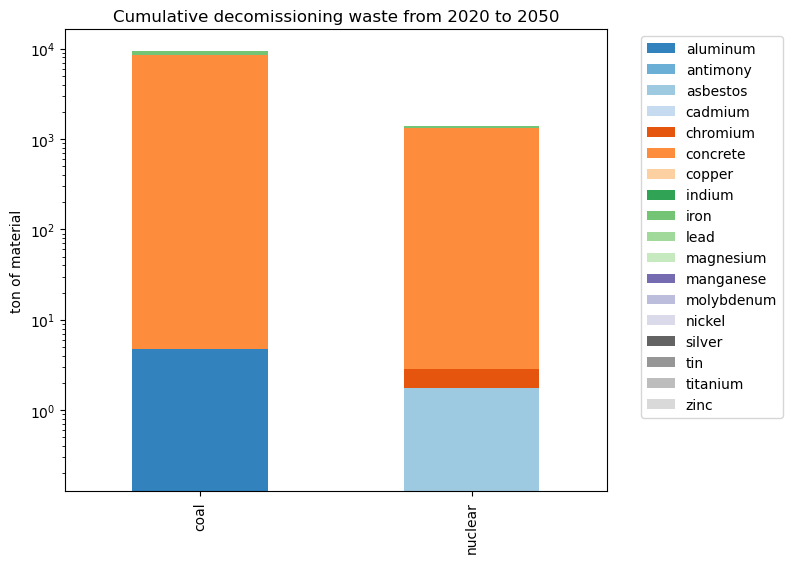

In [94]:
newdf2.plot(kind="bar", stacked=True, colormap='tab20c', figsize=(7,6))
plt.title("Cumulative decomissioning waste from 2020 to 2050")
# plt.xlabel("electricity source")
plt.ylabel("ton of material")
#plt.yscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.savefig('./plots/waste_decom_cumulative.jpg', bbox_inches='tight')

In [95]:
newdf = copy.deepcopy(constr_need)
for i in list(constr_need):
    if sum(constr_need[i]) == 0:
        newdf = newdf.drop(i, axis=1)  

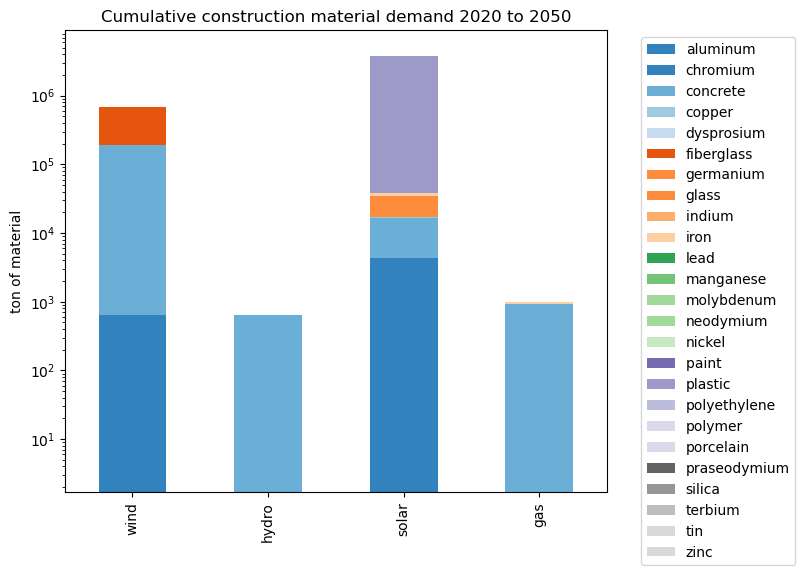

In [96]:
newdf.plot(kind="bar", stacked=True, colormap='tab20c', figsize=(7,6))

plt.title("Cumulative construction material demand 2020 to 2050")
# plt.xlabel("electricity source")
plt.ylabel("ton of material")
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.savefig('./plots/construction_cumulative.jpg', bbox_inches='tight')

In [97]:
mats = list(mats)
mats

['aluminum',
 'coal',
 'concrete',
 'lime_mining_w',
 'lime_FGC',
 'limestone ',
 'antimony',
 'arsenic',
 'barium',
 'beryllium',
 'boron',
 'cadmium',
 'chromium',
 'cobalt',
 'copper',
 'lead',
 'manganese',
 'mercury',
 'molybdenum',
 'nickel',
 'selenium',
 'vanadium',
 'CO2',
 'iron',
 'SOx',
 'ash',
 'NOx',
 'CO',
 'particulates',
 'VOC',
 'FGC',
 'coal_mining_w',
 'copper_mining_w',
 'concrete_mining_w',
 'aluminum_mining_w',
 'iron_mining_w',
 'vegetable_oil ',
 'germanium',
 'glass',
 'indium ',
 'silica_mining_w',
 'germanium_mining_w',
 'indium_mining_w',
 'lead_mining_w',
 'silica',
 'plastic',
 'polyamide',
 'polyester',
 'polyethylene',
 'tin',
 'tin mining waste',
 'asbestos',
 'gadolinium',
 'magnesium',
 'natural_uranium',
 'zirconium',
 'silver',
 'titanium',
 'zinc',
 'zirconium_mining_w',
 'gadolinium_mining_w',
 'antimony_mining_w',
 'asbestos_mining_w',
 'chromium_mining_w',
 'manganese_mining_w ',
 'molybdenum_mining_w',
 'nickel_mining_w ',
 'silver_mining_w',


In [98]:
# (df) generation
# (df) energy_s

mats = list(mats)
years = list(gen.index)[1:]
arr = np.zeros((len(energy_s['source'].unique()), len(years), len(mats)))

# material demand
#####
# for each year
for yearindx, year in enumerate(years): # indx 1
    for source_indx, source in enumerate(energy_s['source'].unique()): # indx 0
        tmpdf = energy_s[energy_s['source'] == source]
        
        # MW
        if source in list(constructions):
            constructed = constructions.loc[str(year)][source] * 1e3 #MW from GW
        else:
            constructed = 0
        if source in list(decommission):
            decommissioned = decommission.loc[str(year)][source] * 1e3
        else:
            decommissioned = 0
            
        # MWh
        if source in list(gen):
            generated = gen.loc[str(year)][source] * 1e6
        else:
            generated = 0
        
        #print(source)
        # get construction demand in kg
        tmpdf2 = tmpdf[tmpdf['stream'] == 'front_need']
        for rownum, row in tmpdf2.iterrows():
            
            mat_index = mats.index(row['material'])
            val = row['amount (kg/MW)'] * constructed #kg
            arr[source_indx, yearindx, mat_index] += val
            

        # get decommission demand in kg
        tmpdf3 = tmpdf[tmpdf['stream'] == 'back_need']
        for rownum, row in tmpdf3.iterrows():
            mat_index = mats.index(row['material'])
            val = row['amount (kg/MW)'] * decommissioned # kg 
            arr[source_indx, yearindx, mat_index] += val
        
        # get operational demand in kg
        tmpdf4 = tmpdf[tmpdf['stream'] == 'oper_need']
        for rownum, row in tmpdf4.iterrows():
            mat_index = mats.index(row['material'])
            # kg / MWh
            val = row['amount (kg/MW)'] * generated # kg
            arr[source_indx, yearindx, mat_index] += val



KeyError: 'amount (kg/MW)'

In [99]:
arr.shape

(6, 28, 97)

IndexError: index 47 is out of bounds for axis 0 with size 47

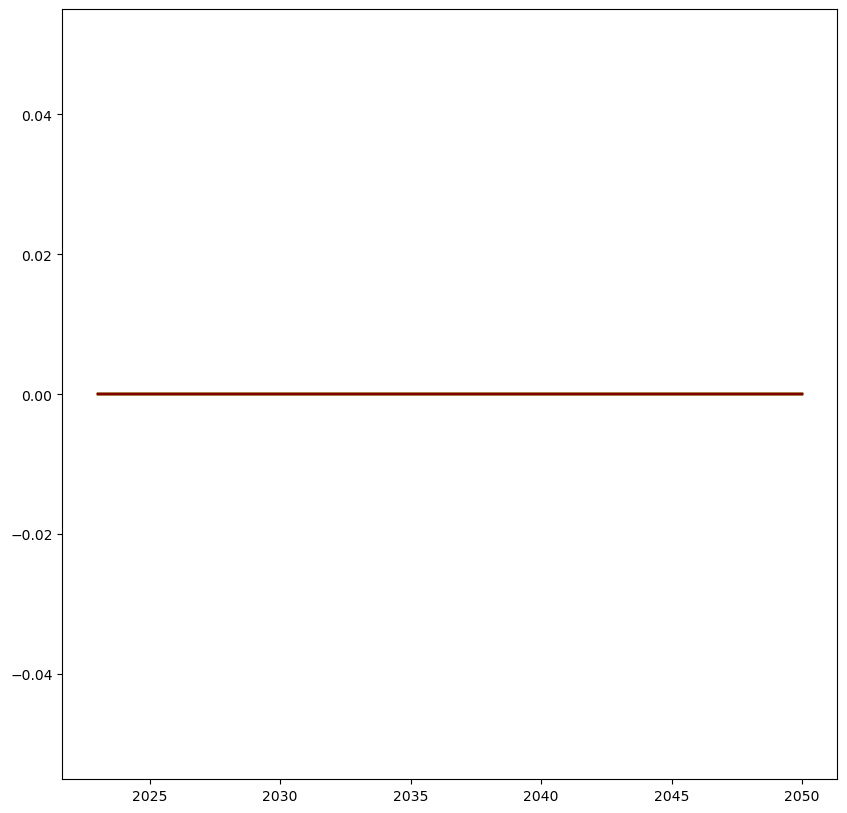

In [100]:
bot = np.zeros(len(years))
import matplotlib.pylab as pl
n = 47
colors = pl.cm.jet(np.linspace(0,1,n))
plt.figure(figsize=(10,10))
per_mat = np.sum(arr, axis=0)
for i in range(per_mat.shape[1]):
    y = np.cumsum(per_mat[:, i])
    label = mats[i]
    x = [int(q) for q in years]
    plt.plot(x, y, label=label, color=colors[i])
    # plt.bar(x, y, bottom=bot, label=label)
    bot += y

per_mat = np.sum(arr, axis=0)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.ylabel("kg of material")
plt.xlabel("year")
#plt.rcParams['axes.facecolor'] = 'white'
plt.xlim([2021,2050])
#plt.rcParams['axes.facecolor'] = 'white'
plt.yscale('log')

plt.title('Material demand for increasing capacity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [101]:
mats = list(mats)

years = list(gen.index)[1:]

arr = np.zeros((len(energy_s['source'].unique()), len(years), len(mats)))

# material demand
#####
# for each year
for yearindx, year in enumerate(years): # indx 1
    for source_indx, source in enumerate(energy_s['source'].unique()): # indx 0
        tmpdf = energy_s[energy_s['source'] == source]
        
        # MW
        if source in list(constructions):
            constructed = constructions.loc[str(year)][source] * 1e3
        else:
            constructed = 0
        if source in list(decommission):
            decommissioned = decommission.loc[str(year)][source] * 1e3
        else:
            decommissioned = 0
            
        # MWh
        if source in list(gen):
            generated = gen.loc[str(year)][source] * 1e6
        else:
            generated = 0
        
        print(source)
        # get construction waste in kg
        tmpdf2 = tmpdf[tmpdf['stream'] == 'front_waste']
        for rownum, row in tmpdf2.iterrows():
            
            mat_index = mats.index(row['material'])
            val = row['amount (kg/MW)'] * constructed #kg
            arr[source_indx, yearindx, mat_index] += val
            

        # get decommission waste in kg
        tmpdf3 = tmpdf[tmpdf['stream'] == 'back_waste']
        for rownum, row in tmpdf3.iterrows():
            mat_index = mats.index(row['material'])
            val = row['amount (kg/MW)'] * decommissioned # kg 
            arr[source_indx, yearindx, mat_index] += val
        
        # get operational waste in kg
        tmpdf4 = tmpdf[tmpdf['stream'] == 'oper_waste']
        for rownum, row in tmpdf4.iterrows():
            mat_index = mats.index(row['material'])
            # kg / MWh
            val = row['amount (kg/MW)'] * generated # kg
            arr[source_indx, yearindx, mat_index] += val


coal


KeyError: 'amount (kg/MW)'

IndexError: index 47 is out of bounds for axis 0 with size 47

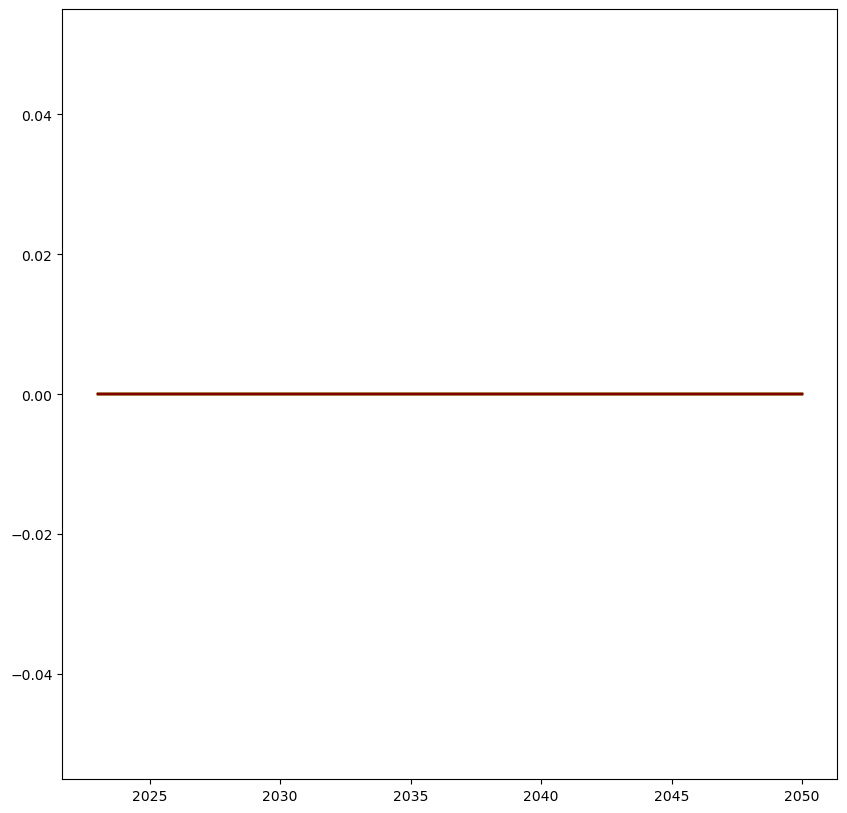

In [109]:
# arr # kg
bot = np.zeros(len(years))
n = 47
colors = pl.cm.jet(np.linspace(0,1,n))
plt.figure(figsize=(10,10))
for i in range(per_mat.shape[1]):
    y = np.cumsum(per_mat[:, i])
    label = mats[i]
    x = [int(q) for q in years]
    plt.plot(x, y, label=label, color=colors[i])
    # plt.bar(x, y, bottom=bot, label=label)
    bot += y

per_mat = np.sum(arr, axis=0)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['axes.facecolor'] = 'white'
plt.ylabel("kg of material")
plt.xlabel("year")
plt.xlim([2021,2050])

plt.yscale('log')
plt.title('Waste generation with increasing capacity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')